In [ ]:
############################################################################################
#   PROJET TND : Prédire / diagnostiquer les troubles du langage chez l’enfant.            #
#   Classification binaire avec des données déséquilibrées.                                #
#------------------------------------------------------------------------------------------#
#   NOTEBOOK DE PREDICTION AVEC UN DECOUPAGE TRAIN / SPLIT :                               #
#      ---> data preparation - données déséquilibrées,                                     #
#      ---> resampling techniques for imbalanced data                                      #
#           (techniques de ré-échantillonnage pour données déséquilibrées),                #
#      ---> data preparation - données équilibrées,                                        #
#      ---> algorithmes d'apprentissage supervisé                                          #
#           (pour résoudre un problème de classification) :                                #
#           * Les K plus proches voisins                                                   #
#           * Modèles linéaires :                                                          #
#               - Modèles linéaires - régression logistique                                #
#               - Modèles linéaires - classification SVM linéaire                          #
#           * Arbres de décision                                                           #
#           * Ensemble d'arbres de décision                                                #
#               - Ensemble d'arbres de décision - forêts aléatoires                        #
#               - Ensemble d'arbres de décision - boosting d'arbres de régression /        #
#                                                 GBRT (Gradient Boosted Regression Trees) #
#           * Réseaux de neurones                                                          #
############################################################################################

In [ ]:
################################################################################
#   GITHUB                                                                     #
#------------------------------------------------------------------------------#
# GitHub                : https://github.com/irribarre                         #
# Repository projet TND : https://github.com/irribarre/Classification_1        #
# Notebook 1            : github_2_prediction_decoupage_train_test_split.ipynb #
################################################################################

In [ ]:
#############################################################################
# PLAN CODE :                                                               #
#############################################################################
# 1. DATA PREPARATION - DONNEES DESEQUILIBREES
#    1.1. DECOUPAGE X / y
#    1.2. DECOUPAGE TRAIN / TEST
# 
# 2. RESAMPLING TECHNIQUES FOR IMBALANCED DATA (TECHNIQUES DE REECHANTILLONNAGE POUR DONNEES DESEQUILIBREES)
#    2.1. RANDOM OVERSAMPLING
#    2.2. RANDOM UNDERSAMPLING
#    2.3. OVERSAMPLING TECHNIQUE : SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE)
#    2.4. UNDERSAMPLING TECHNIQUE : NEARMISS
#     
# 3. DATA PREPARATION - DONNEES EQUILIBREES
#    3.1. DECOUPAGE X / y
#    3.2. DECOUPAGE TRAIN / TEST
# 
# 4. DONNEES COMMUNES
#    4.1. VARIABLES COMMUNES
#    4.2. FONCTIONS COMMUNES
#         4.2.1. AFFICHAGE EN STRING
#         4.2.2. AFFICHAGE ACCURACY TRAIN & TEST
#         4.2.3. AFFICHAGE METRIQUES
#         
# 5. LES K PLUS PROCHES VOISINS
#    5.1. DONNEES DESEQUILIBREES
#         5.1.1. AUCUN HYPERPARAMETRE
#         5.1.2. UN HYPERPARAMETRE
#    5.2. DONNEES EQUILIBREES
#    5.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @                MODELES LINEAIRES                 @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# 6. MODELES LINEAIRES - REGRESSION LOGISTIQUE
#    6.1. DONNEES DESEQUILIBREES
#         6.1.1. AUCUN HYPERPARAMETRE
#         6.1.2. UN HYPERPARAMETRE
#    6.2. DONNEES EQUILIBREES
#    6.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# 7. MODELES LINEAIRES - CLASSIFICATION SVM LINEAIRE
#   7.1. DONNEES DESEQUILIBREES
#        7.1.1. AUCUN HYPERPARAMETRE
#        7.1.2. UN HYPERPARAMETRE
#   7.2. DONNEES EQUILIBREES
#   7.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# 8. ARBRES DE DECISION
#    8.1. DONNEES DESEQUILIBREES
#         8.1.1. AUCUN HYPERPARAMETRE
#         8.1.2. UN HYPERPARAMETRE
#    8.2. DONNEES EQUILIBREES
#    8.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @          ENSEMBLE D'ARBRES DE DECISION           @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# 9. ENSEMBLE D'ARBRES DE DECISION - FORETS ALEATOIRES
#    9.1. DONNEES DESEQUILIBREES
#         9.1.1. AUCUN HYPERPARAMETRE
#        9.1.2. UN HYPERPARAMETRE
#   9.2. DONNEES EQUILIBREES
#   9.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# 10. ENSEMBLE D'ARBRES DE DECISION - BOOSTING D'ARBRES DE REGRESSION / GBRT (GRADIENT BOOSTED REGRESSION TREES)
#     10.1. DONNEES DESEQUILIBREES
#           10.1.1. AUCUN HYPERPARAMETRE
#           10.1.2. UN HYPERPARAMETRE
#     10.2. DONNEES EQUILIBREES
#     10.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# 11. RESEAUX DE NEURONES
#     11.1. DONNEES DESEQUILIBREES
#           11.1.1. AUCUN HYPERPARAMETRE
#           11.1.2. UN HYPERPARAMETRE
#     11.2. DONNEES EQUILIBREES
#     11.3. SYNTHESE POUR TOUS LES DATAFRAMES
#
# 12. SYNTHESE ALGORITHMES
#
# 13. OPTIMISATION
# 13.1. IMPORTANCE DES VARIABLES
# 13.2. OPTIMISATION PARAMETRES MEILLEUR ALGORITHME

In [ ]:
# https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c
# The Python implementation of SMOTE actually comes in its own library (outside Scikit-Learn) 
# which can be installed as follows:
# !pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.image as img

# Resampling
from sklearn.utils import resample
# https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html
from imblearn.under_sampling import NearMiss

# Découpage
from sklearn.model_selection import train_test_split

# Algorithmes sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Métriques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Warning
from warnings import simplefilter

# Feature importance
from sklearn.feature_selection import RFE

In [2]:
# On ignore certains warning
# https://stackoverflow.com/questions/74877602/getting-a-warning-when-using-sklearn-neighbors-about-keepdims
simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
################################################
#      Chargement jeu de données nettoyées     #
################################################
data = pd.read_csv('all_data_R_high_cor_removed_clean.csv',  sep = '\t')

In [4]:
data.columns

Index(['sex', 'age', 'corpus', 'group', 'child_TNW', 'child_TNS',
       'examiner_TNW', 'freq_ttr', 'r_2_i_verbs', 'num_pos_tags', 'n_dos',
       'repetition', 'retracing', 'fillers', 's_1g_ppl', 's_2g_ppl',
       's_3g_ppl', 'd_1g_ppl', 'd_2g_ppl', 'average_syl', 'mlu_words',
       'mlu100_utts', 'verb_utt', 'dss', 'ipsyn_total', 'present_progressive',
       'propositions_in', 'propositions_on', 'plural_s',
       'irregular_past_tense', 'possessive_s', 'uncontractible_copula',
       'articles', 'regular_past_ed', 'regular_3rd_person_s',
       'irregular_3rd_person', 'uncontractible_aux', 'contractible_copula',
       'contractible_aux', 'word_errors', 'f_k', 'n_v', 'n_aux', 'n_3s_v',
       'det_n_pl', 'det_pl_n', 'pro_aux', 'pro_3s_v', 'total_error',
       'age_int'],
      dtype='object')

In [5]:
data.dtypes

sex                        int64
age                        int64
corpus                     int64
group                      int64
child_TNW                  int64
child_TNS                  int64
examiner_TNW               int64
freq_ttr                 float64
r_2_i_verbs              float64
num_pos_tags               int64
n_dos                      int64
repetition                 int64
retracing                  int64
fillers                    int64
s_1g_ppl                 float64
s_2g_ppl                 float64
s_3g_ppl                 float64
d_1g_ppl                 float64
d_2g_ppl                 float64
average_syl              float64
mlu_words                float64
mlu100_utts                int64
verb_utt                 float64
dss                      float64
ipsyn_total                int64
present_progressive        int64
propositions_in            int64
propositions_on            int64
plural_s                   int64
irregular_past_tense       int64
possessive

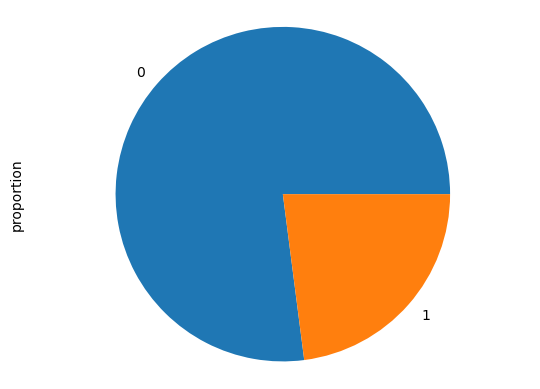

In [6]:
#############################
#   Diagramme en secteurs   #
#############################
data['group'].value_counts(normalize = True).plot(kind = 'pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une ellipse
plt.axis('equal') 
plt.show() # Affiche le graphique

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html
print(data['group'].value_counts()) # proportions (normalize = False (default).

group
0    896
1    267
Name: count, dtype: int64


In [8]:
print(data['group'].value_counts(normalize = True)) # frequencies

group
0    0.770421
1    0.229579
Name: proportion, dtype: float64


In [ ]:
# Les données sont déséquilibrées.

# 1. DATA PREPARATION - DONNEES DESEQUILIBREES

# 1.1. DECOUPAGE X / y

In [9]:
#######################################
# Découpage input features and target #
#######################################
def decoupage_X_y(df_suffix_in, df_in):
    
    ####################################
    #   X = données sans le résultat   #
    ####################################
    # Données internes = données brutes auxquelles on enlève :
    #    > la colonne 'group', car c'est la sortie / résultat. 
    X = df_in.drop(['group'], axis = 1)


    ####################################
    #         y = résultat             #
    ####################################
    y = df_in['group']
    
    
    print('X' + df_suffix_in + ' shape :', X.shape)
    print('y' + df_suffix_in + ' shape :', y.shape)
    
    return X, y

In [10]:
###################################################
# Découpage X, y :                                #
# données déséquilibrées : dataframe data         #
###################################################
X, y = decoupage_X_y(df_suffix_in = '', # pas de suffixe
                     df_in        = data)

X shape : (1163, 49)
y shape : (1163,)


# 1.2. DECOUPAGE TRAIN / TEST

In [11]:
################################################
# Découpage (commun à tous les algorithmes) :  #
#    > training data (75% des données)         #
#    > testing data  (25% des données)         #
################################################
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def decoupage_train_test(df_suffix_in, X_in, y_in, is_stratify_in, random_state_in):
    
    # Maj paramètre stratify
    if (is_stratify_in == True): # la fonction s'exécute toujours de la même façon avec le même split
        stratify_p = y_in
    else:
        stratify_p = None
    
    X_train, X_test, y_train, y_test = train_test_split(X_in, y_in, stratify = stratify_p, random_state = random_state_in)

    # Training data = 75% des données
    print('X_train' + df_suffix_in + ' shape :', X_train.shape)
    print('y_train' + df_suffix_in + ' shape :', y_train.shape)

    # Test data = 25% des données
    print('X_test' + df_suffix_in + '  shape :', X_test.shape)
    print('y_test' + df_suffix_in + '  shape :', y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [12]:
###################################################
# Découpage training data et testing data :       #
# données déséquilibrées : (X, y)                 #
###################################################
#X_train, X_test, y_train, y_test = decoupage_train_test(False, 0)
X_train, X_test, y_train, y_test = decoupage_train_test(df_suffix_in    = '', # pas de suffixe
                                                        X_in            = X,
                                                        y_in            = y, 
                                                        is_stratify_in  = True, 
                                                        random_state_in = 42)

X_train shape : (872, 49)
y_train shape : (872,)
X_test  shape : (291, 49)
y_test  shape : (291,)


# 2. RESAMPLING TECHNIQUES FOR IMBALANCED DATA (TECHNIQUES DE REECHANTILLONNAGE POUR DONNEES DESEQUILIBREES)

In [ ]:
# https://medium.com/@tam.tamanna18/handling-imbalanced-datasets-in-python-methods-and-procedures-7376f99794de
# https://medium.com/codex/handling-imbalanced-data-upsampling-and-downsampling-in-machine-learning-10f33ff0620b
# https://michael-fuchs-python.netlify.app/2020/01/16/dealing-with-imbalanced-classes/
# https://ichi.pro/fr/7-techniques-de-surechantillonnage-pour-gerer-les-donnees-desequilibrees-259836006315167

In [ ]:
# The most common approaches for handling imbalanced datasets involve resampling. 
# Resampling can be divided into two categories :
#    --> oversampling : increasing minority class samples, by duplicating random records from the minority class.
#        It can cause overfitting. 
#
#    --> undersampling : decreasing majority class samples, by removing random records from the majority class.
#        It can cause loss of information. 
#
# Despite the advantage of balancing classes, these techniques also have their weaknesses.

In [13]:
# Separate majority and minority classes into different datasets
df_majority = data[data['group'] == 0] # TD  <-> 0 (no trouble)
df_minority = data[data['group'] == 1] # SLI <-> 1 (trouble)

In [14]:
print('df_majority shape =', df_majority.shape)
print('df_minority shape =', df_minority.shape)

df_majority shape = (896, 50)
df_minority shape = (267, 50)


# 2.1. RANDOM OVERSAMPLING

In [ ]:
# Random oversampling involves duplicating random instances from the minority class until it is balanced with the
# majority class.

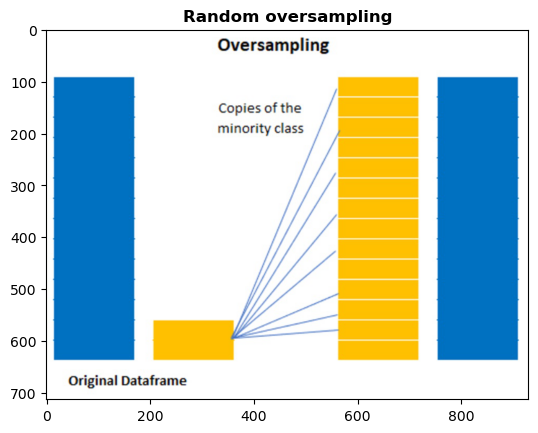

In [15]:
image_over = img.imread('oversampling.jpg')
plt.imshow(image_over)
plt.title('Random oversampling', fontweight = 'bold')
plt.show()

In [16]:
# Upsample minority class with replacement, setting the number of samples to match that of the majority class.
df_minority_upsampled = resample(df_minority, 
                                 replace      = True,             # sample with replacement
                                 n_samples    = len(df_majority), # to match majority class
                                 random_state = 42)
 
# Combine the orginal majority class dataset with upsampled minority class dataset
df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # new dataframe

In [17]:
# Les données sont maintenant équilibrées
print(df_upsampled['group'].value_counts())

group
0    896
1    896
Name: count, dtype: int64


# 2.2. RANDOM UNDERSAMPLING

In [ ]:
# Random undersampling involves removing random instances from the majority class until a balance is achieved.

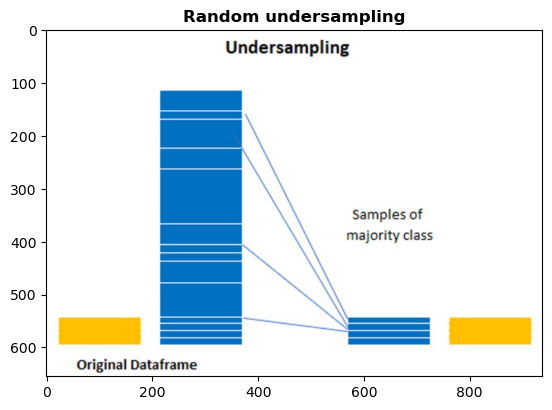

In [18]:
image_under = img.imread('undersampling.jpg')
plt.imshow(image_under)
plt.title('Random undersampling', fontweight = 'bold')
plt.show()

In [19]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace      = False,            # sample without replacement
                                   n_samples    = len(df_minority), # to match minority class 
                                   random_state = 42)                                   
 
# Combine the original minority class with downsampled majority class dataset
df_downsampled = pd.concat([df_majority_downsampled, df_minority]) # new dataframe

In [20]:
# Les données sont maintenant équilibrées
print(df_downsampled['group'].value_counts())

group
0    267
1    267
Name: count, dtype: int64


# 2.3. OVERSAMPLING TECHNIQUE : SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE)

In [ ]:
# SMOTE is an oversampling method. It creates synthetic (not duplicate) samples of the minority class.
# SMOTE makes the minority class equal to the majority class by selecting similar records and altering that record 
# one column at a time by a random amount within the difference to the neighbouring records.

# https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c
# https://www.researchgate.net/figure/Illustrative-overview-of-the-SMOTE_fig1_359676937 : image

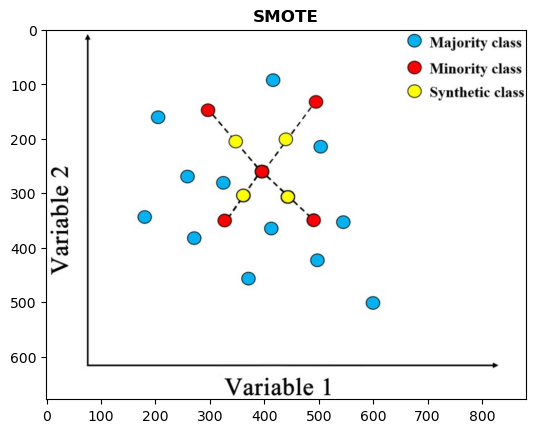

In [21]:
image_smote = img.imread('SMOTE.jpg')
plt.imshow(image_smote)
plt.title('SMOTE', fontweight = 'bold')
plt.show()

In [22]:
# We instantiate an instance of the SMOTE class. 
# It will ensure that there are an equal number of positive samples as negative samples.
sm = SMOTE(random_state = 42)

In [23]:
##################################################################################
# Découpage X, y :                                                               #
# oversampling technique - SMOTE : the SMOTE algorithm resamples the dataset.    #
##################################################################################
X_smote, y_smote = sm.fit_resample(X, y)

print('X_smote shape :', X_smote.shape)
print('X_smote shape :', y_smote.shape)

X_smote shape : (1792, 49)
X_smote shape : (1792,)


In [24]:
print('>' * 7, 'before oversampling smote :\n', y.value_counts(), '\n\n',
      '>' * 7, 'after oversampling smote :\n', y_smote.value_counts())

>>>>>>> before oversampling smote :
 group
0    896
1    267
Name: count, dtype: int64 

 >>>>>>> after oversampling smote :
 group
1    896
0    896
Name: count, dtype: int64


# 2.4. UNDERSAMPLING TECHNIQUE : NEARMISS

In [ ]:
# NearMiss is an undersampling technique. 
# Instead of resampling the Minority class, using a distance, this will make the majority class equal to minority class.
# https://glemaitre.github.io/imbalanced-learn/generated/imblearn.under_sampling.NearMiss.html
# https://www.comet.com/site/blog/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning/ : dessin

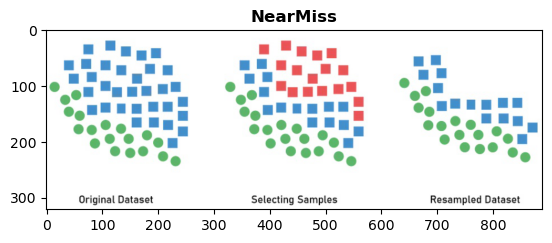

In [25]:
image_nearmiss = img.imread('NearMiss.jpg')
plt.imshow(image_nearmiss)
plt.title('NearMiss', fontweight = 'bold')
plt.show()

In [26]:
# Instanciation
nm = NearMiss()

In [27]:
#####################################################################################
# Découpage X, y :                                                                  #
# oversampling technique - NearMiss : the NearMiss algorithm resamples the dataset. #
#####################################################################################
X_nearmiss, y_nearmiss = nm.fit_resample(X, y)

print('X_nearmiss shape :', X_nearmiss.shape)
print('X_nearmiss shape :', y_nearmiss.shape)

X_nearmiss shape : (534, 49)
X_nearmiss shape : (534,)


In [28]:
print('>' * 7, 'before undersampling NearMiss :\n', y.value_counts(), '\n\n',
      '>' * 7, 'after undersampling NearMiss :\n', y_nearmiss.value_counts())

>>>>>>> before undersampling NearMiss :
 group
0    896
1    267
Name: count, dtype: int64 

 >>>>>>> after undersampling NearMiss :
 group
0    267
1    267
Name: count, dtype: int64


# 3. DATA PREPARATION - DONNEES EQUILIBREES

# 3.1. DECOUPAGE X / y

In [29]:
##########################################################
# Découpage X, y :                                       #
# random duplicate oversampling : dataframe df_upsampled #
##########################################################
X_upsampled, y_upsampled = decoupage_X_y(df_suffix_in = '_upsampled',
                                         df_in        = df_upsampled)

X_upsampled shape : (1792, 49)
y_upsampled shape : (1792,)


In [30]:
#############################################################
# Découpage X, y :                                          #
# random duplicate undersampling : dataframe df_downsampled #
#############################################################
X_downsampled, y_downsampled = decoupage_X_y(df_suffix_in = '_downsampled',
                                             df_in        = df_downsampled)

X_downsampled shape : (534, 49)
y_downsampled shape : (534,)


In [ ]:
#############################################################
# Découpage X, y :                                          #
# oversampling technique - SMOTE                            #
# oversampling technique - NearMiss                         #
#############################################################
# cf. ci-dessus. 

# 3.2. DECOUPAGE TRAIN / TEST

In [31]:
##############################################################
# Découpage training data et testing data :                  #
# random duplicate oversampling : (X_upsampled, y_upsampled) #
##############################################################
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = \
decoupage_train_test(df_suffix_in    = '_upsampled',
                     X_in            = X_upsampled,
                     y_in            = y_upsampled, 
                     is_stratify_in  = True,
                     random_state_in = 42)

X_train_upsampled shape : (1344, 49)
y_train_upsampled shape : (1344,)
X_test_upsampled  shape : (448, 49)
y_test_upsampled  shape : (448,)


In [32]:
###################################################################
# Découpage training data et testing data :                       #
# random duplicate undersampling : (X_downsampled, y_downsampled) #
###################################################################
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = \
decoupage_train_test(df_suffix_in    = '_downsampled',
                     X_in            = X_downsampled,
                     y_in            = y_downsampled, 
                     is_stratify_in  = True,
                     random_state_in = 42)

X_train_downsampled shape : (400, 49)
y_train_downsampled shape : (400,)
X_test_downsampled  shape : (134, 49)
y_test_downsampled  shape : (134,)


In [33]:
##########################################################
# Découpage training data et testing data :              #
# oversampling technique - SMOTE : (X_smote, y_smote)    #
##########################################################
X_train_smote, X_test_smote, y_train_smote, y_test_smote = \
decoupage_train_test(df_suffix_in    = '_smote', 
                     X_in            = X_smote, 
                     y_in            = y_smote, 
                     is_stratify_in  = True,
                     random_state_in = 42)

X_train_smote shape : (1344, 49)
y_train_smote shape : (1344,)
X_test_smote  shape : (448, 49)
y_test_smote  shape : (448,)


In [34]:
#################################################################
# Découpage training data et testing data :                     #
# undersampling technique - NearMiss : (X_nearmiss, y_nearmiss) #
#################################################################
X_train_nearmiss, X_test_nearmiss, y_train_nearmiss, y_test_nearmiss = \
decoupage_train_test(df_suffix_in    = '_nearmiss', 
                     X_in            = X_nearmiss,
                     y_in            = y_nearmiss,
                     is_stratify_in  = True,
                     random_state_in = 42)

X_train_nearmiss shape : (400, 49)
y_train_nearmiss shape : (400,)
X_test_nearmiss  shape : (134, 49)
y_test_nearmiss  shape : (134,)


# 4. DONNEES COMMUNES

In [ ]:
# Données communes aux algorithmes ci-après.

# 4.1. VARIABLES COMMUNES

In [35]:
# Liste des noms des dataframes.
# Remarque : pour les données synthétiques, nous simmulons un dataframe qui n'a pas été créé.
df_name_list = ['data',           # données déséquilibrées
                'df_upsampled',   # random duplicate oversampling
                'df_downsampled', # random duplicate undersampling
                'df_smote',       # synthetic oversampling - SMOTE
                'df_nearmiss']    # synthetic undersampling - NearMiss

In [36]:
print('df_name_list =', 
      '\n\t-', df_name_list, 
      '\n\t- élément avec le + grand nombre de caractères = ', 
      max(df_name_list), '(', len(max(df_name_list)), 'caractères )')

df_name_list = 
	- ['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'] 
	- élément avec le + grand nombre de caractères =  df_upsampled ( 12 caractères )


In [37]:
###############################################################################
# Dictionnaires pour stocker les résultats d'algorithme de chaque classifier  #
###############################################################################
dict_algo_knn        = {} # Classification k-NN (knn = k-nearest neighbors) / KNeighborsClassifier

# ----------------------------------------
# Modèles linéaires
# ----------------------------------------
dict_algo_logreg     = {} # Classification linéaire régression logistique   / LogisticRegression
dict_algo_linear_svm = {} # Classification SVM lineaire                     / LinearSVC

dict_algo_tree       = {} # Classification arbre de décision                / DecisionTreeClassifier

# ----------------------------------------
# Ensemble d'arbres de décision
# ----------------------------------------
dict_algo_forest     = {} # Classification forêt aléatoire                  / RandomForestClassifier
dict_algo_gbrt       = {} # Classification  boosting d'arbres de régression / GradientBoostingClassifier
                          # GBRT (Gradient Boosted Regression Trees)

# ----------------------------------------
# Reseaux de neurones
# ----------------------------------------
dict_algo_mlp        = {} # Classification perceptron multicouche           / MLPClassifier
                          # MLP (MultiLayer Perceptron)

In [38]:
# Initialisation des dictionnaires imbriqués dans les dict_algo_xxx : dict_algo_xxx[df_name][yyy], avec
#    --> df_name = nom du dataframe (contenu dans df_name_list)
#    --> yyy = 'train_accuracy', 'test_accuracy'
for df_name in df_name_list:
    dict_algo_knn[df_name]        = {}
    dict_algo_logreg[df_name]     = {}
    dict_algo_linear_svm[df_name] = {}
    dict_algo_tree[df_name]       = {}
    dict_algo_forest[df_name]     = {}
    dict_algo_gbrt[df_name]       = {}
    dict_algo_mlp[df_name]        = {}
    
# Affichage keys des dictionnaires imbriqués
print('dict_algo_knn\t\tkeys :', dict_algo_knn.keys())
print('dict_algo_logreg\tkeys :', dict_algo_logreg.keys())
print('dict_algo_linear_svm\tkeys :', dict_algo_linear_svm.keys())
print('dict_algo_tree\t\tkeys :', dict_algo_tree.keys())
print('dict_algo_forest\tkeys :', dict_algo_forest.keys())
print('dict_algo_gbrt\t\tkeys :', dict_algo_gbrt.keys())
print('dict_algo_mlp\t\tkeys :', dict_algo_mlp.keys())

dict_algo_knn		keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_algo_logreg	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_algo_linear_svm	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_algo_tree		keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_algo_forest	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_algo_gbrt		keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_algo_mlp		keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])


In [39]:
subkey_algo = ['train_accuracy', 'test_accuracy']
print('subkey_algo =', subkey_algo)

subkey_algo = ['train_accuracy', 'test_accuracy']


In [40]:
##################################################################
# Dictionnaires pour stocker les métriques de chaque classifier  #
##################################################################
dict_metric_knn        = {} # Classification k-NN (knn = k-nearest neighbors) / KNeighborsClassifier

# ----------------------------------------
# Modèles linéaires
# ----------------------------------------
dict_metric_logreg     = {} # Classification linéaire régression logistique   / LogisticRegression
dict_metric_linear_svm = {} # Classification SVM lineaire                     / LinearSVC

dict_metric_tree       = {} # Classification arbre de décision                / DecisionTreeClassifier

# ----------------------------------------
# Ensemble d'arbres de décision
# ----------------------------------------
dict_metric_forest     = {} # Classification forêt aléatoire                  / RandomForestClassifier
dict_metric_gbrt       = {} # Classification boosting d'arbres de régression  / GradientBoostingClassifier
                            # GBRT (Gradient Boosted Regression Trees)
    
# ----------------------------------------
# Réseaux de neurones
# ----------------------------------------
dict_metric_mlp        = {} # Classification perceptron multicouche           / MLPClassifier
#                             MLP (multilayer perceptron)   

In [41]:
# Initialisation des dictionnaires imbriqués dans les dict_metric_xxx : dict_metric_xxx[df_name][yyy], avec
#    --> df_name = nom du dataframe (contenu dans df_name_list)
#    --> yyy = 'confusion_matrix', 'confusion_matrix_normalised', 'classification_report', 'accuracy_score',
#              'recall_score', 'precision_score', 'f1_score'
for df_name in df_name_list:
    dict_metric_knn[df_name]        = {}
    dict_metric_logreg[df_name]     = {}
    dict_metric_linear_svm[df_name] = {}
    dict_metric_tree[df_name]       = {}
    dict_metric_forest[df_name]     = {}
    dict_metric_gbrt[df_name]       = {}
    dict_metric_mlp[df_name]        = {}
    
# Affichage keys des dictionnaires imbriqués
print('dict_metric_knn\t\tkeys :', dict_metric_knn.keys())
print('dict_metric_logreg\tkeys :', dict_metric_logreg.keys())
print('dict_metric_linear_svm\tkeys :', dict_metric_linear_svm.keys())
print('dict_metric_tree\tkeys :', dict_metric_tree.keys())
print('dict_metric_forest\tkeys :', dict_metric_forest.keys())
print('dict_metric_gbrt\tkeys :', dict_metric_gbrt.keys())
print('dict_metric_mlp\t\tkeys :', dict_metric_mlp.keys())

dict_metric_knn		keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_metric_logreg	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_metric_linear_svm	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_metric_tree	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_metric_forest	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_metric_gbrt	keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])
dict_metric_mlp		keys : dict_keys(['data', 'df_upsampled', 'df_downsampled', 'df_smote', 'df_nearmiss'])


In [42]:
subkey_metric = ['confusion_matrix', 'confusion_matrix_normalised', 'classification_report', 'accuracy_score',
                 'recall_score', 'precision_score', 'f1_score']
print('subkey_metric =', subkey_metric)

subkey_metric = ['confusion_matrix', 'confusion_matrix_normalised', 'classification_report', 'accuracy_score', 'recall_score', 'precision_score', 'f1_score']


# 4.2. FONCTIONS COMMUNES

# 4.2.1. AFFICHAGE EN STRING

In [43]:
###################################################
# Extraction du dict_algo_xxx à partir de son nom #
###################################################
def process_dict_algo(dict_algo_name_in):

    if (dict_algo_name_in == 'dict_algo_knn'):
        dict_algo = dict_algo_knn
    elif (dict_algo_name_in == 'dict_algo_logreg'):
        dict_algo = dict_algo_logreg
    elif (dict_algo_name_in == 'dict_algo_linear_svm'):
        dict_algo = dict_algo_linear_svm
    elif (dict_algo_name_in == 'dict_algo_tree'):
        dict_algo = dict_algo_tree
    elif (dict_algo_name_in == 'dict_algo_forest'):
        dict_algo = dict_algo_forest
    elif (dict_algo_name_in == 'dict_algo_gbrt'):
        dict_algo = dict_algo_gbrt
    elif (dict_algo_name_in == 'dict_algo_mlp'):
        dict_algo = dict_algo_mlp
    else:
        dict_algo = ''

    return dict_algo 

In [44]:
#####################################################
# Extraction du dict_metric_xxx à partir de son nom #
#####################################################
def process_dict_metric(dict_metric_name_in):

    if (dict_metric_name_in == 'dict_metric_knn'):
        dict_metric = dict_metric_knn
    elif (dict_metric_name_in == 'dict_metric_logreg'):
        dict_metric = dict_metric_logreg
    elif (dict_metric_name_in == 'dict_metric_linear_svm'):
        dict_metric = dict_metric_linear_svm
    elif (dict_metric_name_in == 'dict_metric_tree'):
        dict_metric = dict_metric_tree
    elif (dict_metric_name_in == 'dict_metric_forest'):
        dict_metric = dict_metric_forest
    elif (dict_metric_name_in == 'dict_metric_gbrt'):
        dict_metric = dict_metric_gbrt
    elif (dict_metric_name_in == 'dict_metric_mlp'):
        dict_metric = dict_metric_mlp
    else:
        dict_metric = ''

    return dict_metric 

# 4.2.2. AFFICHAGE TRAIN & TEST ACCURACY

In [45]:
# -----------------------------------------------------------------------------------------------------------
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre (pour comparaison)
# pour un dataframe
# -----------------------------------------------------------------------------------------------------------
def affichage_train_test_accuracy(dict_algo_name_in,
                                  df_name_in,
                                  hyperparameter_settings_in,
                                  hyperparameter_name_in,
                                  train_accuracy_in,
                                  test_accuracy_in):

    plt.figure(figsize = (5.5, 3.5)) # (WIDTH_SIZE, HEIGHT_SIZE)

    plt.plot(hyperparameter_settings_in, train_accuracy_in, label = 'train accuracy')
    plt.plot(hyperparameter_settings_in, test_accuracy_in, label = 'test accuracy')

    plt.xlabel(hyperparameter_name_in)
    plt.ylabel('Accuracy')
    plt.title(dict_algo_name_in + ' / dataframe ' + df_name_in + ' : train / test accuracy', 
              fontsize = 12, color = 'blue', fontweight = 'bold') 
    plt.grid()
    plt.legend()
    plt.show()

In [46]:
# -----------------------------------------------------------------------------------------------------------
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre
# pour tous les dataframes d'un type d'algorithme
# -----------------------------------------------------------------------------------------------------------
def affichage_train_test_accuracy_all(dict_algo_name_in,
                                      hyperparameter_settings_in,
                                      hyperparameter_name_in):
    
    ind = 1
    fig = plt.figure(figsize = (12, 7)) # (WIDTH_SIZE, HEIGHT_SIZE)
    
    
    # Extraction du dict_algo_xxx à partir du paramètre dict_algo_name_in
    dict_algo = process_dict_algo(dict_algo_name_in = dict_algo_name_in)

    
    for df_name in df_name_list:

        # Données avant nettoyage
        plt.subplot(2, 3, ind)
                
        plt.plot(hyperparameter_settings_in, dict_algo[df_name]['train_accuracy'], label = 'train accuracy')
        plt.plot(hyperparameter_settings_in, dict_algo[df_name]['test_accuracy'], label = 'test accuracy')
        
        plt.xlabel(hyperparameter_name_in + '\n')
        plt.ylabel('Accuracy')
        plt.title('dataframe ' + df_name, fontsize = 12, color = 'blue', fontweight = 'bold')    
        plt.grid()
        plt.legend()
        
        ind = ind + 1
          
    plt.suptitle(dict_algo_name_in + ' : train / test accuracy par dataframe', fontsize = 18, fontweight = 'bold')
    fig.tight_layout()  # Espace entre les subplots    
    plt.show()

# 4.2.3. AFFICHAGE METRIQUES

In [47]:
# -------------------------------------------------------
# Métriques du meilleur score : 
# Calcul et mise à jour dans dict_metric_in
# -------------------------------------------------------
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
def metrics_best_score(dict_metric_in, y_in, y_test_in, y_pred_in, is_affichage_in):

    #################################################
    # MATRICE DE CONFUSION :                        #
    #################################################    
    # Matrice de confusion : résumé des résultats de prédictions sur un problème de classification.
    #
    # |                           |    Classe prédite   |
    # |                           | NO (TD) | YES (SLI) |
    # |---------------------------|---------|-----------|
    # | Classe réelle | NO (TD)   |    TN   |     FP    |
    # |               | YES (SLI) |    FN   |     TP    |
    
    
    # Matrice de confusion
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # Base = y_pred
    confusion = confusion_matrix(y_true = y_test_in, 
                                 y_pred = y_pred_in)
    dict_metric_in['confusion_matrix'] = confusion
    if (is_affichage_in):
        print('Confusion matrix :\n{}'.format(dict_metric_in['confusion_matrix']), '\n')

    # Matrice de confusion normalisée
    dict_metric_in['confusion_matrix_normalised'] = confusion * round(len(y_in) / len(y_pred_in))
    if (is_affichage_in):    
        print('Confusion matrix normalised :\n{}'.format(dict_metric_in['confusion_matrix_normalised']))
    
    # Classification report
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    dict_metric_in['classification_report'] = classification_report(y_true = y_test_in, 
                                                                    y_pred = y_pred_in)
    if (is_affichage_in):    
        print('\nClassification report :\n', dict_metric_in['classification_report'], '\n')

    
    
    #################################################
    # ACCURACY SCORE                                #
    #################################################
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    #
    # Accuracy score : rapport entre le nombre de prédictions correctes et le nombre total d’échantillons traités.
    #
    #                  TP + TN
    # accuracy = -------------------
    #             TP + TN + FP + FN
    
    dict_metric_in['accuracy_score'] = accuracy_score(y_true = y_test_in, 
                                                      y_pred = y_pred_in)
    print('Accuracy score\t= {:.3f}'.format(dict_metric_in['accuracy_score']))


    
    #################################################
    # RECALL SCORE                                  #
    #################################################
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    #
    # Recall score (ou sensibilité ou taux positif réel) : nombre de vrais positifs divisé par le nombre de valeurs 
    # positives dans les données de test. C’est une mesure de l’exhaustivité du classifieur. 
    # Un faible recall indique un nombre élevé de faux négatifs.
    #
    #                    True Positive
    # recall = --------------------------------
    #           True Positive + False Negative
   
    dict_metric_in['recall_score'] = recall_score(y_true = y_test_in, 
                                                  y_pred = y_pred_in)
    print('Recall score\t= {:.3f}'.format(dict_metric_in['recall_score']))

    
    
    #################################################
    # PRECISION SCORE                               #
    #################################################   
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    #
    # Precision score (ou valeur prédictive positive) : nombre de vrais positifs divisé par toutes les prédictions positives.
    # C’est une mesure de l’exactitude du classificateur. 
    # Une faible précision indique un nombre élevé de faux positifs.
    #    
    #                       True Positive
    # precision = --------------------------------
    #              True Positive + False Positive
    
    dict_metric_in['precision_score'] = precision_score(y_true = y_test_in, 
                                                        y_pred = y_pred_in)
    print('Precision score\t= {:.3f}'.format(dict_metric_in['precision_score']))

   
    
    #################################################
    # F1 SCORE                                      # 
    ################################################# 
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
    #
    # F1 score : moyenne pondérée de la précision et du recall. 
    # 1 indique une précision et recall parfaits et 0 pire.
    #
    #          Precision * Recall
    # F1 = 2* --------------------
    #          Precision + Recall

    dict_metric_in['f1_score'] = f1_score(y_true = y_test_in, 
                                          y_pred = y_pred_in)
    print('F1 score\t= {:.3f}'.format(dict_metric_in['f1_score']))

In [48]:
# ---------------------------------------------------------------------------------
# Affichage métriques 'confusion_xxx' du meilleur score 
# pour tous les dataframes d'un type d'algorithme
# ---------------------------------------------------------------------------------
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
def affichage_metrics_confusion_xxx(dict_metric_in, dict_metric_name_in):

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    # @   df_name = 'confusion_matrix', 'confusion_matrix_normalised'               @
    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    
    for subkey in ['confusion_matrix', 'confusion_matrix_normalised']:
        print('@' * 40, dict_metric_name_in, '/', subkey, ':', '@' * 29)
        for df_name in df_name_list:
            len_delta = len(max(df_name_list)) - len(df_name) + 5
            print(subkey, '/', df_name, ':')
            print(dict_metric_in[df_name][subkey], '\n')
        print('\n')

In [50]:
# ---------------------------------------------------------------------------------
# Affichage métriques 'classification_report' du meilleur score 
# pour tous les dataframes d'un type d'algorithme
# ---------------------------------------------------------------------------------
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
def affichage_metrics_classification_report(dict_metric_in, dict_metric_name_in):

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    # @   df_name = 'classification_report'                                         @
    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    
    for subkey in ['classification_report']:
        print('@' * 40, dict_metric_name_in, '/', subkey, ':', '@' * 35)
        for df_name in df_name_list:
            len_delta = len(max(df_name_list)) - len(df_name) + 5
            print(subkey, '/', df_name, ':')
            print(dict_metric_in[df_name][subkey], '\n')

In [51]:
# ---------------------------------------------------------------------------------
# Affichage métriques 'xxx_score' du meilleur score 
# pour tous les dataframes d'un type d'algorithme
# ---------------------------------------------------------------------------------
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
def affichage_metrics_xxx_score(dict_metric_in, dict_metric_name_in):
    
    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    # @   df_name = 'accuracy_score', 'recall_score', 'precision_score', 'f1_score' @
    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    print('@' * 40, dict_metric_name_in, '/', 'xxx_score', ':', '@' * 40)
    
    print('metric\t\t| data\t\tdf_upsampled\tdf_downsampled\tdf_smote\tdf_nearmiss')
    print('-' * 16 + '|' + '-' * 80)
    for subkey in subkey_metric:
        if subkey in ['accuracy_score', 'recall_score', 'precision_score', 'f1_score']:
            line = subkey + '\t' + '| '
            for df_name in df_name_list:
                line = line + str(round(dict_metric_in[df_name][subkey], 3)) + '\t\t'
            print(line)

#    # Vérification écriture tableau
#    print('\nVérification :')
#    for subkey in subkey_metric:
#        if subkey in ['accuracy_score', 'recall_score', 'precision_score', 'f1_score']:
#            print(subkey, ':')
#            for df_name in df_name_list:
#                len_delta = len(max(df_name_list)) - len(df_name) + 5
#                print('\t', df_name, len_delta * ' ', round(dict_metric_in[df_name][subkey], 4))

In [52]:
############################################################################
# Fonction qui appelle les fonctions d'affichage des différentes métriques #
# du meilleur score pour tous les dataframes d'un type d'algorithme        #
############################################################################
def affichage_metrics_best_score_all(dict_metric_name_in):
    
    # Extraction nom du dict_metric_xxx à partir du paramètre dict_metric_in
    dict_metric = process_dict_metric(dict_metric_name_in = dict_metric_name_in)
    
    # Affichage métriques 'confusion_xxx'
    affichage_metrics_confusion_xxx(dict_metric_in      = dict_metric,
                                    dict_metric_name_in = dict_metric_name_in)    

    # Affichage métriques 'classification_report'
    affichage_metrics_classification_report(dict_metric_in      = dict_metric,
                                            dict_metric_name_in = dict_metric_name_in) 
    
    # Affichage métriques 'xxx_score'
    affichage_metrics_xxx_score(dict_metric_in      = dict_metric,
                                dict_metric_name_in = dict_metric_name_in) 

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @ Ce paragraphe est la phase 4 (modélisation / choix algorithmes) de la méthode CRISP.                      @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# 5. LES K PLUS PROCHES VOISINS

In [53]:
# Hyperparamètre algorithme
neighbors_knn_settings = range(1, 30)

In [54]:
# ------------------------------------------------------------------
# Fonction K_plus_proches_voisins pour une valeur de neighbors_in
# ------------------------------------------------------------------
def K_plus_proches_voisins(neighbors_in, X_train_in, X_test_in, y_train_in, y_test_in):
    
    # classification k-NN (knn = k-nearest neighbors)
    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    knn = KNeighborsClassifier(n_neighbors = neighbors_in)

    # construction du modèle à partir des données train
    knn.fit(X_train_in, y_train_in)

    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = knn.score(X_train_in, y_train_in)

    # prédiction sur les données de test
    y_pred = knn.predict(X_test_in)

    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = knn.score(X_test_in, y_test_in)

    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', n_neighbors =', neighbors_in)
    
    return train_accuracy_out, test_accuracy_out, y_pred

In [55]:
# -------------------------------------------------------------------------
# Fonction K_plus_proches_voisins pour toutes les valeurs de neighbors_in
# -------------------------------------------------------------------------
def K_plus_proches_voisins_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, is_affichage_in):
    
    # initialisation
    best_test_accuracy_knn        = 0
    best_test_neighbors_knn       = 0
    associated_train_accuracy_knn = 0
    train_accuracy_knn            = []
    test_accuracy_knn             = []
    dict_algo_name                = 'dict_algo_knn'
    algo_et_df_name               = dict_algo_name + ' / dataframe ' + df_name_in

    
    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in neighbors_knn_settings:
        train_accuracy, test_accuracy, y_pred = K_plus_proches_voisins(neighbors_in = ind, 
                                                                       X_train_in   = X_train_in, 
                                                                       X_test_in    = X_test_in, 
                                                                       y_train_in   = y_train_in, 
                                                                       y_test_in    = y_test_in)
        
        # Stockage dans les listes
        train_accuracy_knn.append(train_accuracy)
        test_accuracy_knn.append(test_accuracy)

        # Meilleur score (données test)
        if (test_accuracy > best_test_accuracy_knn):
            best_test_accuracy_knn        = test_accuracy
            best_test_neighbors_knn       = ind
            associated_train_accuracy_knn = train_accuracy
            y_pred_knn                    = y_pred
            
            
    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_knn
    # ---------------------------------------------------------
    dict_algo_knn[df_name_in]['train_accuracy'] = train_accuracy_knn
    dict_algo_knn[df_name_in]['test_accuracy']  = test_accuracy_knn

    
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre n_neighbors
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = neighbors_knn_settings, 
                                      hyperparameter_name_in     = 'n_neighbors', 
                                      train_accuracy_in          = train_accuracy_knn, 
                                      test_accuracy_in           = test_accuracy_knn)


    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 15)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_knn),
          '\nbest test neighbors\t\t=', best_test_neighbors_knn,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_knn)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(dict_metric_in  = dict_metric_knn[df_name_in],
                       y_in            = y_in,
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_knn,
                       is_affichage_in = is_affichage_in)

# 5.1. DONNEES DESEQUILIBREES

# 5.1.1. AUCUN HYPERPARAMETRE

In [56]:
# ----------------------------------------------------
# Classification k-NN 
# ----------------------------------------------------
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('[KNeighborsClassifier] train set accuracy = {:.3f}'.format(knn.score(X_train, y_train)), 
      ', test set accuracy = {:.3f}'.format(knn.score(X_test, y_test)))

[KNeighborsClassifier] train set accuracy = 0.826 , test set accuracy = 0.742


# 5.1.2. UN HYPERPARAMETRE

train set accuracy = 1.000 , test set accuracy = 0.694 , n_neighbors = 1
train set accuracy = 0.846 , test set accuracy = 0.746 , n_neighbors = 2
train set accuracy = 0.860 , test set accuracy = 0.756 , n_neighbors = 3
train set accuracy = 0.819 , test set accuracy = 0.742 , n_neighbors = 4
train set accuracy = 0.826 , test set accuracy = 0.742 , n_neighbors = 5
train set accuracy = 0.808 , test set accuracy = 0.756 , n_neighbors = 6
train set accuracy = 0.808 , test set accuracy = 0.756 , n_neighbors = 7
train set accuracy = 0.795 , test set accuracy = 0.766 , n_neighbors = 8
train set accuracy = 0.794 , test set accuracy = 0.777 , n_neighbors = 9
train set accuracy = 0.788 , test set accuracy = 0.766 , n_neighbors = 10
train set accuracy = 0.792 , test set accuracy = 0.759 , n_neighbors = 11
train set accuracy = 0.783 , test set accuracy = 0.763 , n_neighbors = 12
train set accuracy = 0.784 , test set accuracy = 0.766 , n_neighbors = 13
train set accuracy = 0.774 , test set accuracy 

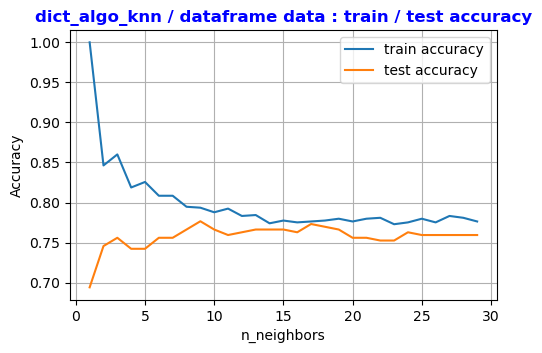





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe data : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.777 
best test neighbors		= 9 
associated train set accuracy	= 0.794




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe data : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[217   7]
 [ 58   9]] 

Confusion matrix normalised :
[[868  28]
 [232  36]]

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       224
           1       0.56      0.13      0.22        67

    accuracy                           0.78       291
   macro avg       0.68      0.55      0.54       291
weighted avg       0.74      0.78      0.72       291
 

Accuracy score	= 0.777
Recall score	= 0.134
Precision score	= 0.562
F1 score	= 0.217


In [57]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
K_plus_proches_voisins_all(df_name_in      = 'data',
                           X_train_in      = X_train, 
                           X_test_in       = X_test, 
                           y_train_in      = y_train, 
                           y_test_in       = y_test,
                           y_in            = y,
                           is_affichage_in = True)

In [ ]:
# Accuracy est correcte.
# Recall faible, car la class target est déséquilibrée (imbalanced).

# 5.2. DONNEES EQUILIBREES

train set accuracy = 1.000 , test set accuracy = 0.873 , n_neighbors = 1
train set accuracy = 0.967 , test set accuracy = 0.795 , n_neighbors = 2
train set accuracy = 0.902 , test set accuracy = 0.781 , n_neighbors = 3
train set accuracy = 0.879 , test set accuracy = 0.752 , n_neighbors = 4
train set accuracy = 0.847 , test set accuracy = 0.772 , n_neighbors = 5
train set accuracy = 0.833 , test set accuracy = 0.725 , n_neighbors = 6
train set accuracy = 0.812 , test set accuracy = 0.739 , n_neighbors = 7
train set accuracy = 0.801 , test set accuracy = 0.732 , n_neighbors = 8
train set accuracy = 0.790 , test set accuracy = 0.721 , n_neighbors = 9
train set accuracy = 0.789 , test set accuracy = 0.725 , n_neighbors = 10
train set accuracy = 0.790 , test set accuracy = 0.723 , n_neighbors = 11
train set accuracy = 0.766 , test set accuracy = 0.699 , n_neighbors = 12
train set accuracy = 0.763 , test set accuracy = 0.710 , n_neighbors = 13
train set accuracy = 0.764 , test set accuracy 

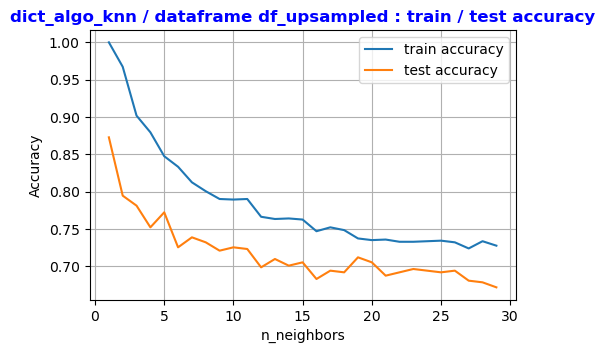





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_upsampled : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.873 
best test neighbors		= 1 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_upsampled : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[175  49]
 [  8 216]] 

Confusion matrix normalised :
[[700 196]
 [ 32 864]]

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       224
           1       0.82      0.96      0.88       224

    accuracy                           0.87       448
   macro avg       0.89      0.87      0.87       448
weighted avg       0.89      0.87      0.87       448
 

Accuracy score	= 0.873
Recall score	= 0.964
Precision score	= 0.815
F1 score	= 0.883


In [58]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
K_plus_proches_voisins_all(df_name_in      = 'df_upsampled',
                           X_train_in      = X_train_upsampled, 
                           X_test_in       = X_test_upsampled, 
                           y_train_in      = y_train_upsampled, 
                           y_test_in       = y_test_upsampled,
                           y_in            = y_upsampled,
                           is_affichage_in = True)

train set accuracy = 1.000 , test set accuracy = 0.582 , n_neighbors = 1
train set accuracy = 0.802 , test set accuracy = 0.582 , n_neighbors = 2
train set accuracy = 0.785 , test set accuracy = 0.627 , n_neighbors = 3
train set accuracy = 0.730 , test set accuracy = 0.612 , n_neighbors = 4
train set accuracy = 0.750 , test set accuracy = 0.627 , n_neighbors = 5
train set accuracy = 0.710 , test set accuracy = 0.590 , n_neighbors = 6
train set accuracy = 0.723 , test set accuracy = 0.627 , n_neighbors = 7
train set accuracy = 0.670 , test set accuracy = 0.612 , n_neighbors = 8
train set accuracy = 0.693 , test set accuracy = 0.657 , n_neighbors = 9
train set accuracy = 0.662 , test set accuracy = 0.634 , n_neighbors = 10
train set accuracy = 0.690 , test set accuracy = 0.687 , n_neighbors = 11
train set accuracy = 0.677 , test set accuracy = 0.664 , n_neighbors = 12
train set accuracy = 0.677 , test set accuracy = 0.672 , n_neighbors = 13
train set accuracy = 0.660 , test set accuracy 

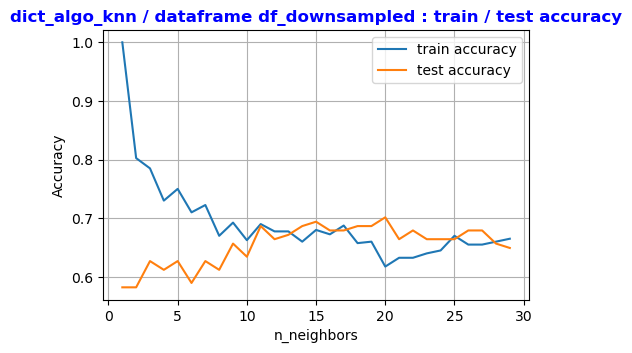





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_downsampled : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.701 
best test neighbors		= 20 
associated train set accuracy	= 0.618




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_downsampled : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[58  9]
 [31 36]] 

Confusion matrix normalised :
[[232  36]
 [124 144]]

Classification report :
               precision    recall  f1-score   support

           0       0.65      0.87      0.74        67
           1       0.80      0.54      0.64        67

    accuracy                           0.70       134
   macro avg       0.73      0.70      0.69       134
weighted avg       0.73      0.70      0.69       134
 

Accuracy score	= 0.701
Recall score	= 0.537
Precision score	= 0.800
F1 score	= 0.643


In [59]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
K_plus_proches_voisins_all(df_name_in      = 'df_downsampled',
                           X_train_in      = X_train_downsampled, 
                           X_test_in       = X_test_downsampled, 
                           y_train_in      = y_train_downsampled, 
                           y_test_in       = y_test_downsampled,
                           y_in            = y_downsampled,
                           is_affichage_in = True)

train set accuracy = 1.000 , test set accuracy = 0.833 , n_neighbors = 1
train set accuracy = 0.978 , test set accuracy = 0.837 , n_neighbors = 2
train set accuracy = 0.908 , test set accuracy = 0.804 , n_neighbors = 3
train set accuracy = 0.903 , test set accuracy = 0.804 , n_neighbors = 4
train set accuracy = 0.859 , test set accuracy = 0.786 , n_neighbors = 5
train set accuracy = 0.865 , test set accuracy = 0.804 , n_neighbors = 6
train set accuracy = 0.836 , test set accuracy = 0.801 , n_neighbors = 7
train set accuracy = 0.832 , test set accuracy = 0.804 , n_neighbors = 8
train set accuracy = 0.814 , test set accuracy = 0.786 , n_neighbors = 9
train set accuracy = 0.814 , test set accuracy = 0.788 , n_neighbors = 10
train set accuracy = 0.800 , test set accuracy = 0.786 , n_neighbors = 11
train set accuracy = 0.799 , test set accuracy = 0.779 , n_neighbors = 12
train set accuracy = 0.785 , test set accuracy = 0.779 , n_neighbors = 13
train set accuracy = 0.785 , test set accuracy 

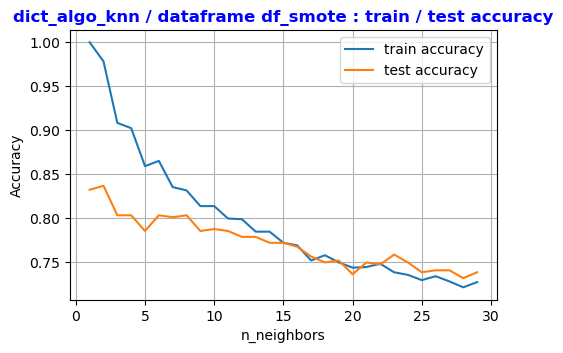





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_smote : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.837 
best test neighbors		= 2 
associated train set accuracy	= 0.978




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_smote : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[178  46]
 [ 27 197]] 

Confusion matrix normalised :
[[712 184]
 [108 788]]

Classification report :
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       224
           1       0.81      0.88      0.84       224

    accuracy                           0.84       448
   macro avg       0.84      0.84      0.84       448
weighted avg       0.84      0.84      0.84       448
 

Accuracy score	= 0.837
Recall score	= 0.879
Precision score	= 0.811
F1 score	= 0.844


In [60]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
K_plus_proches_voisins_all(df_name_in      = 'df_smote',
                           X_train_in      = X_train_smote, 
                           X_test_in       = X_test_smote, 
                           y_train_in      = y_train_smote, 
                           y_test_in       = y_test_smote,
                           y_in            = y_smote,
                           is_affichage_in = True)

train set accuracy = 1.000 , test set accuracy = 0.716 , n_neighbors = 1
train set accuracy = 0.840 , test set accuracy = 0.694 , n_neighbors = 2
train set accuracy = 0.868 , test set accuracy = 0.672 , n_neighbors = 3
train set accuracy = 0.820 , test set accuracy = 0.679 , n_neighbors = 4
train set accuracy = 0.830 , test set accuracy = 0.687 , n_neighbors = 5
train set accuracy = 0.802 , test set accuracy = 0.679 , n_neighbors = 6
train set accuracy = 0.812 , test set accuracy = 0.679 , n_neighbors = 7
train set accuracy = 0.787 , test set accuracy = 0.687 , n_neighbors = 8
train set accuracy = 0.797 , test set accuracy = 0.672 , n_neighbors = 9
train set accuracy = 0.755 , test set accuracy = 0.649 , n_neighbors = 10
train set accuracy = 0.780 , test set accuracy = 0.679 , n_neighbors = 11
train set accuracy = 0.752 , test set accuracy = 0.649 , n_neighbors = 12
train set accuracy = 0.775 , test set accuracy = 0.649 , n_neighbors = 13
train set accuracy = 0.743 , test set accuracy 

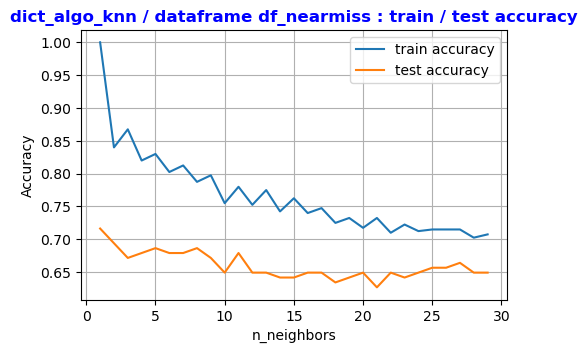





@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_nearmiss : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.716 
best test neighbors		= 1 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_knn / dataframe df_nearmiss : best parameters metrics @@@@@@@@@@@@@@@@@@@
Confusion matrix :
[[52 15]
 [23 44]] 

Confusion matrix normalised :
[[208  60]
 [ 92 176]]

Classification report :
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        67
           1       0.75      0.66      0.70        67

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.72      0.72      0.72       134
 

Accuracy score	= 0.716
Recall score	= 0.657
Precision score	= 0.746
F1 score	= 0.698


In [61]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
K_plus_proches_voisins_all(df_name_in      = 'df_nearmiss',
                           X_train_in      = X_train_nearmiss, 
                           X_test_in       = X_test_nearmiss, 
                           y_train_in      = y_train_nearmiss, 
                           y_test_in       = y_test_nearmiss,
                           y_in            = y_nearmiss,
                           is_affichage_in = True)

# 5.3. SYNTHESE POUR TOUS LES DATAFRAMES

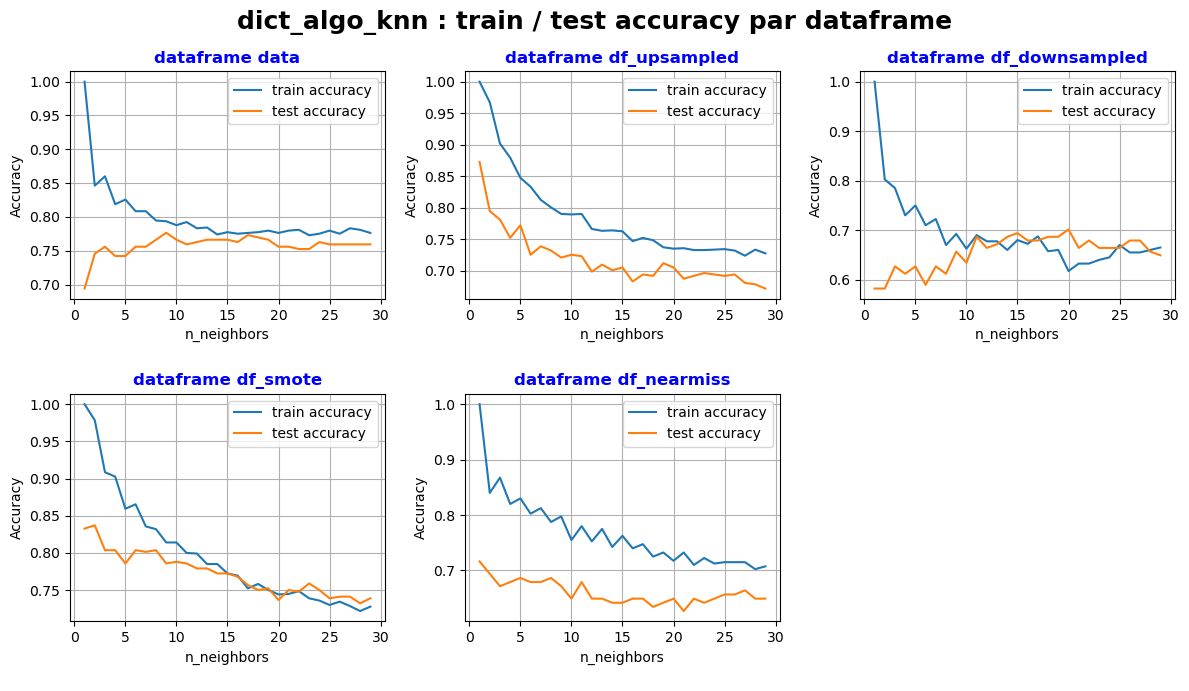

In [62]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_knn)                   #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_knn',
                                  hyperparameter_settings_in = neighbors_knn_settings, 
                                  hyperparameter_name_in     = 'n_neighbors')

In [63]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_knn)                                                                 #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_knn')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_knn / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[217   7]
 [ 58   9]] 

confusion_matrix / df_upsampled :
[[175  49]
 [  8 216]] 

confusion_matrix / df_downsampled :
[[58  9]
 [31 36]] 

confusion_matrix / df_smote :
[[178  46]
 [ 27 197]] 

confusion_matrix / df_nearmiss :
[[52 15]
 [23 44]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_knn / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[868  28]
 [232  36]] 

confusion_matrix_normalised / df_upsampled :
[[700 196]
 [ 32 864]] 

confusion_matrix_normalised / df_downsampled :
[[232  36]
 [124 144]] 

confusion_matrix_normalised / df_smote :
[[712 184]
 [108 788]] 

confusion_matrix_normalised / df_nearmiss :
[[208  60]
 [ 92 176]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_knn / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification_report / data :
    

# 6. MODELES LINEAIRES - REGRESSION LOGISTIQUE

In [64]:
# Hyperparamètre algorithme
C_logreg_settings = (0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 20, 50)

In [65]:
# -------------------------------------------------------------------------------
# Fonction classification linéaire régression logistique pour une valeur de C_in
# -------------------------------------------------------------------------------
def modele_lineaire_regression_logistique(C_in, X_train_in, X_test_in, y_train_in, y_test_in):
   
    # classification linéaire régression logistique
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    logreg = LogisticRegression(C = C_in, solver = 'liblinear', penalty = 'l2', max_iter = 10000)   
    
    # construction du modèle à partir des données train
    logreg.fit(X_train_in, y_train_in)
    
    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = logreg.score(X_train_in, y_train_in)
    
    # prédiction sur les données de test
    y_pred = logreg.predict(X_test_in)
          
    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = logreg.score(X_test_in, y_test_in)
        
    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', C = ', C_in)

    return train_accuracy_out, test_accuracy_out, y_pred

In [66]:
# ---------------------------------------------------------------------------------------
# Fonction classification linéaire régression logistique pour toutes les valeurs de C_in
# ---------------------------------------------------------------------------------------
def modele_lineaire_regression_logistique_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, 
                                              is_affichage_in):

    # initialisation
    best_test_accuracy_logreg        = 0
    best_test_C_logreg               = 0
    associated_train_accuracy_logreg = 0
    train_accuracy_logreg            = []
    test_accuracy_logreg             = []
    dict_algo_name                   = 'dict_algo_logreg'
    algo_et_df_name                  = dict_algo_name + ' / dataframe ' + df_name_in


    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in C_logreg_settings:
        train_accuracy, test_accuracy, y_pred = modele_lineaire_regression_logistique(C_in         = ind,
                                                                                      X_train_in   = X_train_in, 
                                                                                      X_test_in    = X_test_in, 
                                                                                      y_train_in   = y_train_in, 
                                                                                      y_test_in    = y_test_in)

        # Stockage dans les listes
        train_accuracy_logreg.append(train_accuracy)
        test_accuracy_logreg.append(test_accuracy)
        
        # Meilleur score (données test)
        if (test_accuracy > best_test_accuracy_logreg):
            best_test_accuracy_logreg        = test_accuracy
            best_test_C_logreg               = ind
            associated_train_accuracy_logreg = train_accuracy
            y_pred_logreg                    = y_pred

            
    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_logreg
    # ---------------------------------------------------------
    dict_algo_logreg[df_name_in]['train_accuracy'] = train_accuracy_logreg
    dict_algo_logreg[df_name_in]['test_accuracy']  = test_accuracy_logreg

    
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre C
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = C_logreg_settings, 
                                      hyperparameter_name_in     = 'C', 
                                      train_accuracy_in          = train_accuracy_logreg, 
                                      test_accuracy_in           = test_accuracy_logreg)


    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 12)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_logreg),
          '\nbest test C\t\t\t=', best_test_C_logreg,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_logreg)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 16)
    metrics_best_score(dict_metric_in  = dict_metric_logreg[df_name_in],
                       y_in            = y_in, 
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_logreg,
                       is_affichage_in = is_affichage_in)

# 6.1. DONNEES DESEQUILIBREES

# 6.1.1. AUCUN HYPERPARAMETRE

In [67]:
# ----------------------------------------------------
# classification linéaire régression logistique
# ----------------------------------------------------
logreg = LogisticRegression(max_iter = 10000) # default value : max_iter = 100
logreg.fit(X_train, y_train)
print('[LogisticRegression] train set accuracy = {:.3f}'.format(logreg.score(X_train, y_train)), 
      ', test set accuracy = {:.3f}'.format(logreg.score(X_test, y_test)))

[LogisticRegression] train set accuracy = 0.858 , test set accuracy = 0.838


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 6.1.2. UN HYPERPARAMETRE

In [68]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
modele_lineaire_regression_logistique_all(df_name_in      = 'data',
                                          X_train_in      = X_train, 
                                          X_test_in       = X_test, 
                                          y_train_in      = y_train, 
                                          y_test_in       = y_test,
                                          y_in            = y,
                                          is_affichage_in = False)

train set accuracy = 0.795 , test set accuracy = 0.790 , C =  0.0001
train set accuracy = 0.820 , test set accuracy = 0.808 , C =  0.001
train set accuracy = 0.849 , test set accuracy = 0.832 , C =  0.01
train set accuracy = 0.862 , test set accuracy = 0.832 , C =  0.1
train set accuracy = 0.864 , test set accuracy = 0.828 , C =  1.0
train set accuracy = 0.867 , test set accuracy = 0.842 , C =  10.0
train set accuracy = 0.867 , test set accuracy = 0.849 , C =  20
train set accuracy = 0.867 , test set accuracy = 0.838 , C =  50




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe data : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.849 
best test C			= 20 
associated train set accuracy	= 0.867




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe data : best parameters metrics @@@@@@@@@@@@@@@@
Accuracy score	= 0.849
Recall score	= 0.567
Precision score	= 0.717
F1 score	= 0.633


# 6.2. DONNEES EQUILIBREES

In [69]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
modele_lineaire_regression_logistique_all(df_name_in      = 'df_upsampled',
                                          X_train_in      = X_train_upsampled, 
                                          X_test_in       = X_test_upsampled, 
                                          y_train_in      = y_train_upsampled, 
                                          y_test_in       = y_test_upsampled,
                                          y_in            = y_upsampled,
                                          is_affichage_in = False)

train set accuracy = 0.725 , test set accuracy = 0.717 , C =  0.0001
train set accuracy = 0.783 , test set accuracy = 0.781 , C =  0.001
train set accuracy = 0.822 , test set accuracy = 0.790 , C =  0.01
train set accuracy = 0.831 , test set accuracy = 0.808 , C =  0.1
train set accuracy = 0.835 , test set accuracy = 0.804 , C =  1.0
train set accuracy = 0.830 , test set accuracy = 0.799 , C =  10.0
train set accuracy = 0.830 , test set accuracy = 0.806 , C =  20
train set accuracy = 0.831 , test set accuracy = 0.806 , C =  50




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_upsampled : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.808 
best test C			= 0.1 
associated train set accuracy	= 0.831




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_upsampled : best parameters metrics @@@@@@@@@@@@@@@@
Accuracy score	= 0.808
Recall score	= 0.826
Precision score	= 0.797
F1 score	= 0.811


In [70]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
modele_lineaire_regression_logistique_all(df_name_in      = 'df_downsampled',
                                          X_train_in      = X_train_downsampled, 
                                          X_test_in       = X_test_downsampled, 
                                          y_train_in      = y_train_downsampled, 
                                          y_test_in       = y_test_downsampled,
                                          y_in            = y_downsampled,
                                          is_affichage_in = False)

train set accuracy = 0.713 , test set accuracy = 0.664 , C =  0.0001
train set accuracy = 0.772 , test set accuracy = 0.701 , C =  0.001
train set accuracy = 0.805 , test set accuracy = 0.739 , C =  0.01
train set accuracy = 0.828 , test set accuracy = 0.746 , C =  0.1
train set accuracy = 0.815 , test set accuracy = 0.731 , C =  1.0
train set accuracy = 0.823 , test set accuracy = 0.761 , C =  10.0
train set accuracy = 0.823 , test set accuracy = 0.769 , C =  20
train set accuracy = 0.825 , test set accuracy = 0.769 , C =  50




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_downsampled : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.769 
best test C			= 20 
associated train set accuracy	= 0.823




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_downsampled : best parameters metrics @@@@@@@@@@@@@@@@
Accuracy score	= 0.769
Recall score	= 0.791
Precision score	= 0.757
F1 score	= 0.774


In [71]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
modele_lineaire_regression_logistique_all(df_name_in      = 'df_smote',
                                          X_train_in      = X_train_smote, 
                                          X_test_in       = X_test_smote, 
                                          y_train_in      = y_train_smote, 
                                          y_test_in       = y_test_smote,
                                          y_in            = y_smote,
                                          is_affichage_in = False)

train set accuracy = 0.751 , test set accuracy = 0.728 , C =  0.0001
train set accuracy = 0.818 , test set accuracy = 0.779 , C =  0.001
train set accuracy = 0.845 , test set accuracy = 0.790 , C =  0.01
train set accuracy = 0.877 , test set accuracy = 0.839 , C =  0.1
train set accuracy = 0.893 , test set accuracy = 0.857 , C =  1.0
train set accuracy = 0.895 , test set accuracy = 0.866 , C =  10.0
train set accuracy = 0.894 , test set accuracy = 0.864 , C =  20
train set accuracy = 0.894 , test set accuracy = 0.864 , C =  50




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_smote : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.866 
best test C			= 10.0 
associated train set accuracy	= 0.895




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_smote : best parameters metrics @@@@@@@@@@@@@@@@
Accuracy score	= 0.866
Recall score	= 0.853
Precision score	= 0.876
F1 score	= 0.864


In [72]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
modele_lineaire_regression_logistique_all(df_name_in      = 'df_nearmiss',
                                          X_train_in      = X_train_nearmiss, 
                                          X_test_in       = X_test_nearmiss, 
                                          y_train_in      = y_train_nearmiss, 
                                          y_test_in       = y_test_nearmiss,
                                          y_in            = y_nearmiss,
                                          is_affichage_in = False)

train set accuracy = 0.792 , test set accuracy = 0.731 , C =  0.0001
train set accuracy = 0.830 , test set accuracy = 0.746 , C =  0.001
train set accuracy = 0.853 , test set accuracy = 0.776 , C =  0.01
train set accuracy = 0.873 , test set accuracy = 0.784 , C =  0.1
train set accuracy = 0.892 , test set accuracy = 0.776 , C =  1.0
train set accuracy = 0.887 , test set accuracy = 0.761 , C =  10.0
train set accuracy = 0.890 , test set accuracy = 0.769 , C =  20
train set accuracy = 0.892 , test set accuracy = 0.769 , C =  50




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_nearmiss : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.784 
best test C			= 0.1 
associated train set accuracy	= 0.873




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_logreg / dataframe df_nearmiss : best parameters metrics @@@@@@@@@@@@@@@@
Accuracy score	= 0.784
Recall score	= 0.672
Precision score	= 0.865
F1 score	= 0.756


# 6.3. SYNTHESE POUR TOUS LES DATAFRAMES

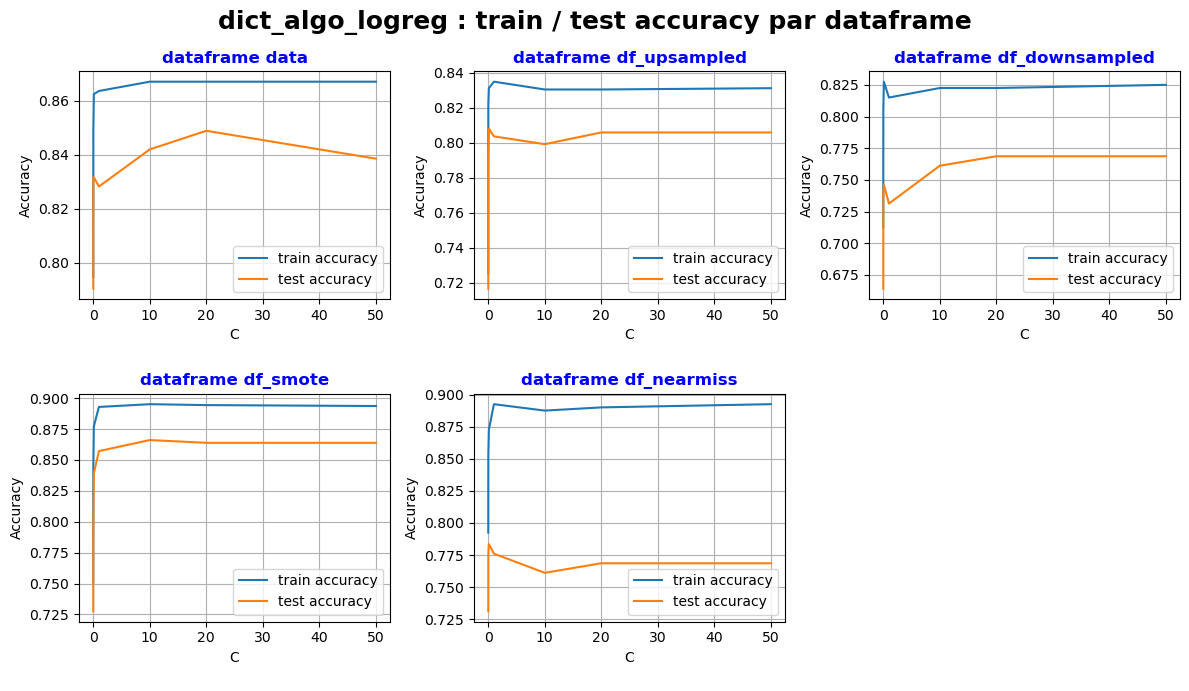

In [73]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_logreg)                #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_logreg',
                                  hyperparameter_settings_in = C_logreg_settings, 
                                  hyperparameter_name_in     = 'C')

In [74]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_logreg)                                                              #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_logreg')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_logreg / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[209  15]
 [ 29  38]] 

confusion_matrix / df_upsampled :
[[177  47]
 [ 39 185]] 

confusion_matrix / df_downsampled :
[[50 17]
 [14 53]] 

confusion_matrix / df_smote :
[[197  27]
 [ 33 191]] 

confusion_matrix / df_nearmiss :
[[60  7]
 [22 45]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_logreg / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[836  60]
 [116 152]] 

confusion_matrix_normalised / df_upsampled :
[[708 188]
 [156 740]] 

confusion_matrix_normalised / df_downsampled :
[[200  68]
 [ 56 212]] 

confusion_matrix_normalised / df_smote :
[[788 108]
 [132 764]] 

confusion_matrix_normalised / df_nearmiss :
[[240  28]
 [ 88 180]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_logreg / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification_report / da

# 7. MODELES LINEAIRES - CLASSIFICATION SVM LINEAIRE

In [75]:
# Hyperparamètre algorithme
C_linear_svm_settings = (1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0)

In [76]:
# -------------------------------------------------------------
# Fonction classification SVM lineaire pour une valeur de C_in
# -------------------------------------------------------------
def classification_svm_lineaire(C_in, X_train_in, X_test_in, y_train_in, y_test_in):
   
    # classification linéaire régression logistique
    linear_svm = LinearSVC(C = C_in, random_state = 0, max_iter = 5000, dual = False)

    # construction du modèle à partir des données train
    linear_svm.fit(X_train_in, y_train_in)
    
    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = linear_svm.score(X_train_in, y_train_in)

    # prédiction sur les données de test
    y_pred = linear_svm.predict(X_test_in)
          
    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = linear_svm.score(X_test_in, y_test_in)
 
    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', C = ', C_in)

    return train_accuracy_out, test_accuracy_out, y_pred

In [77]:
# ---------------------------------------------------------------------
# Fonction classification SVM lineaire pour toutes les valeurs de C_in
# ---------------------------------------------------------------------
def classification_svm_lineaire_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, is_affichage_in):

    # initialisation
    best_test_accuracy_linear_svm        = 0
    best_test_C_linear_svm               = 0
    associated_train_accuracy_linear_svm = 0
    train_accuracy_linear_svm            = []
    test_accuracy_linear_svm             = [] 
    dict_algo_name                       = 'dict_algo_linear_svm'
    algo_et_df_name                      = dict_algo_name + ' / dataframe ' + df_name_in


    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in C_linear_svm_settings:
        train_accuracy, test_accuracy, y_pred = classification_svm_lineaire(C_in         = ind,
                                                                            X_train_in   = X_train_in, 
                                                                            X_test_in    = X_test_in, 
                                                                            y_train_in   = y_train_in, 
                                                                            y_test_in    = y_test_in)

        # Stockage dans les listes
        train_accuracy_linear_svm.append(train_accuracy)
        test_accuracy_linear_svm.append(test_accuracy)        
        
        # Meilleur score (données test)
        if (test_accuracy > best_test_accuracy_linear_svm):
            best_test_accuracy_linear_svm        = test_accuracy
            best_test_C_linear_svm               = ind
            associated_train_accuracy_linear_svm = train_accuracy
            y_pred_linear_svm                    = y_pred

        
    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_linear_svm
    # ---------------------------------------------------------
    dict_algo_linear_svm[df_name_in]['train_accuracy'] = train_accuracy_linear_svm
    dict_algo_linear_svm[df_name_in]['test_accuracy']  = test_accuracy_linear_svm
    
        
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre C
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = C_linear_svm_settings, 
                                      hyperparameter_name_in     = 'C', 
                                      train_accuracy_in          = train_accuracy_linear_svm, 
                                      test_accuracy_in           = test_accuracy_linear_svm)
        
        
    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 8)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_linear_svm),
          '\nbest test C\t\t\t=', best_test_C_linear_svm,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_linear_svm)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 12)
    metrics_best_score(dict_metric_in  = dict_metric_linear_svm[df_name_in],
                       y_in            = y_in, 
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_linear_svm,
                       is_affichage_in = is_affichage_in)

# 7.1. DONNEES DESEQUILIBREES

# 7.1.1. AUCUN HYPERPARAMETRE

In [78]:
# ----------------------------------------------------
# classification SVM linéaire
# ----------------------------------------------------
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
print('[LinearSVC] train set accuracy = {:.3f}'.format(linear_svm.score(X_train, y_train)), 
      ', test set accuracy = {:.3f}'.format(linear_svm.score(X_test, y_test)))

[LinearSVC] train set accuracy = 0.865 , test set accuracy = 0.845


# 7.1.2. UN HYPERPARAMETRE

In [79]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
classification_svm_lineaire_all(df_name_in      = 'data',
                                X_train_in      = X_train, 
                                X_test_in       = X_test, 
                                y_train_in      = y_train, 
                                y_test_in       = y_test,
                                y_in            = y,
                                is_affichage_in = False)

train set accuracy = 0.865 , test set accuracy = 0.845 , C =  1.0
train set accuracy = 0.862 , test set accuracy = 0.845 , C =  2.0
train set accuracy = 0.862 , test set accuracy = 0.845 , C =  3.0
train set accuracy = 0.865 , test set accuracy = 0.849 , C =  4.0
train set accuracy = 0.862 , test set accuracy = 0.849 , C =  5.0
train set accuracy = 0.861 , test set accuracy = 0.849 , C =  7.0
train set accuracy = 0.864 , test set accuracy = 0.845 , C =  8.0
train set accuracy = 0.865 , test set accuracy = 0.849 , C =  9.0
train set accuracy = 0.862 , test set accuracy = 0.852 , C =  10.0
train set accuracy = 0.866 , test set accuracy = 0.849 , C =  15.0
train set accuracy = 0.865 , test set accuracy = 0.849 , C =  20.0




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_linear_svm / dataframe data : best parameters information @@@@@@@@
best test set accuracy		= 0.852 
best test C			= 10.0 
associated train set accuracy	= 0.862




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_l

# 7.2. DONNEES EQUILIBREES

In [80]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
classification_svm_lineaire_all(df_name_in      = 'df_upsampled',
                                X_train_in      = X_train_upsampled, 
                                X_test_in       = X_test_upsampled, 
                                y_train_in      = y_train_upsampled, 
                                y_test_in       = y_test_upsampled,
                                y_in            = y_upsampled,
                                is_affichage_in = False)

train set accuracy = 0.828 , test set accuracy = 0.799 , C =  1.0
train set accuracy = 0.830 , test set accuracy = 0.801 , C =  2.0
train set accuracy = 0.831 , test set accuracy = 0.806 , C =  3.0
train set accuracy = 0.829 , test set accuracy = 0.801 , C =  4.0
train set accuracy = 0.830 , test set accuracy = 0.804 , C =  5.0
train set accuracy = 0.830 , test set accuracy = 0.806 , C =  7.0
train set accuracy = 0.830 , test set accuracy = 0.804 , C =  8.0
train set accuracy = 0.829 , test set accuracy = 0.804 , C =  9.0
train set accuracy = 0.828 , test set accuracy = 0.804 , C =  10.0
train set accuracy = 0.830 , test set accuracy = 0.806 , C =  15.0
train set accuracy = 0.829 , test set accuracy = 0.804 , C =  20.0




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_linear_svm / dataframe df_upsampled : best parameters information @@@@@@@@
best test set accuracy		= 0.806 
best test C			= 3.0 
associated train set accuracy	= 0.831




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict

In [81]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
classification_svm_lineaire_all(df_name_in      = 'df_downsampled',
                                X_train_in      = X_train_downsampled, 
                                X_test_in       = X_test_downsampled, 
                                y_train_in      = y_train_downsampled, 
                                y_test_in       = y_test_downsampled,
                                y_in            = y_downsampled,
                                is_affichage_in = False)

train set accuracy = 0.825 , test set accuracy = 0.761 , C =  1.0
train set accuracy = 0.828 , test set accuracy = 0.754 , C =  2.0
train set accuracy = 0.825 , test set accuracy = 0.746 , C =  3.0
train set accuracy = 0.825 , test set accuracy = 0.761 , C =  4.0
train set accuracy = 0.820 , test set accuracy = 0.754 , C =  5.0
train set accuracy = 0.825 , test set accuracy = 0.761 , C =  7.0
train set accuracy = 0.823 , test set accuracy = 0.754 , C =  8.0
train set accuracy = 0.820 , test set accuracy = 0.761 , C =  9.0
train set accuracy = 0.830 , test set accuracy = 0.754 , C =  10.0
train set accuracy = 0.823 , test set accuracy = 0.746 , C =  15.0
train set accuracy = 0.815 , test set accuracy = 0.754 , C =  20.0




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_linear_svm / dataframe df_downsampled : best parameters information @@@@@@@@
best test set accuracy		= 0.761 
best test C			= 1.0 
associated train set accuracy	= 0.825




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ di

In [82]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
classification_svm_lineaire_all(df_name_in      = 'df_smote',
                                X_train_in      = X_train_smote, 
                                X_test_in       = X_test_smote, 
                                y_train_in      = y_train_smote, 
                                y_test_in       = y_test_smote,
                                y_in            = y_smote,
                                is_affichage_in = False)

train set accuracy = 0.893 , test set accuracy = 0.866 , C =  1.0
train set accuracy = 0.891 , test set accuracy = 0.866 , C =  2.0
train set accuracy = 0.890 , test set accuracy = 0.864 , C =  3.0
train set accuracy = 0.892 , test set accuracy = 0.866 , C =  4.0
train set accuracy = 0.892 , test set accuracy = 0.862 , C =  5.0
train set accuracy = 0.891 , test set accuracy = 0.866 , C =  7.0
train set accuracy = 0.891 , test set accuracy = 0.857 , C =  8.0
train set accuracy = 0.891 , test set accuracy = 0.866 , C =  9.0
train set accuracy = 0.891 , test set accuracy = 0.862 , C =  10.0
train set accuracy = 0.891 , test set accuracy = 0.864 , C =  15.0
train set accuracy = 0.891 , test set accuracy = 0.864 , C =  20.0




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_linear_svm / dataframe df_smote : best parameters information @@@@@@@@
best test set accuracy		= 0.866 
best test C			= 1.0 
associated train set accuracy	= 0.893




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_alg

In [83]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
classification_svm_lineaire_all(df_name_in      = 'df_nearmiss',
                                X_train_in      = X_train_nearmiss, 
                                X_test_in       = X_test_nearmiss, 
                                y_train_in      = y_train_nearmiss, 
                                y_test_in       = y_test_nearmiss,
                                y_in            = y_nearmiss,
                                is_affichage_in = False)

train set accuracy = 0.887 , test set accuracy = 0.776 , C =  1.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  2.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  3.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  4.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  5.0
train set accuracy = 0.890 , test set accuracy = 0.769 , C =  7.0
train set accuracy = 0.887 , test set accuracy = 0.761 , C =  8.0
train set accuracy = 0.890 , test set accuracy = 0.769 , C =  9.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  10.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  15.0
train set accuracy = 0.890 , test set accuracy = 0.776 , C =  20.0




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_linear_svm / dataframe df_nearmiss : best parameters information @@@@@@@@
best test set accuracy		= 0.776 
best test C			= 1.0 
associated train set accuracy	= 0.887




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_

# 7.3. SYNTHESE POUR TOUS LES DATAFRAMES

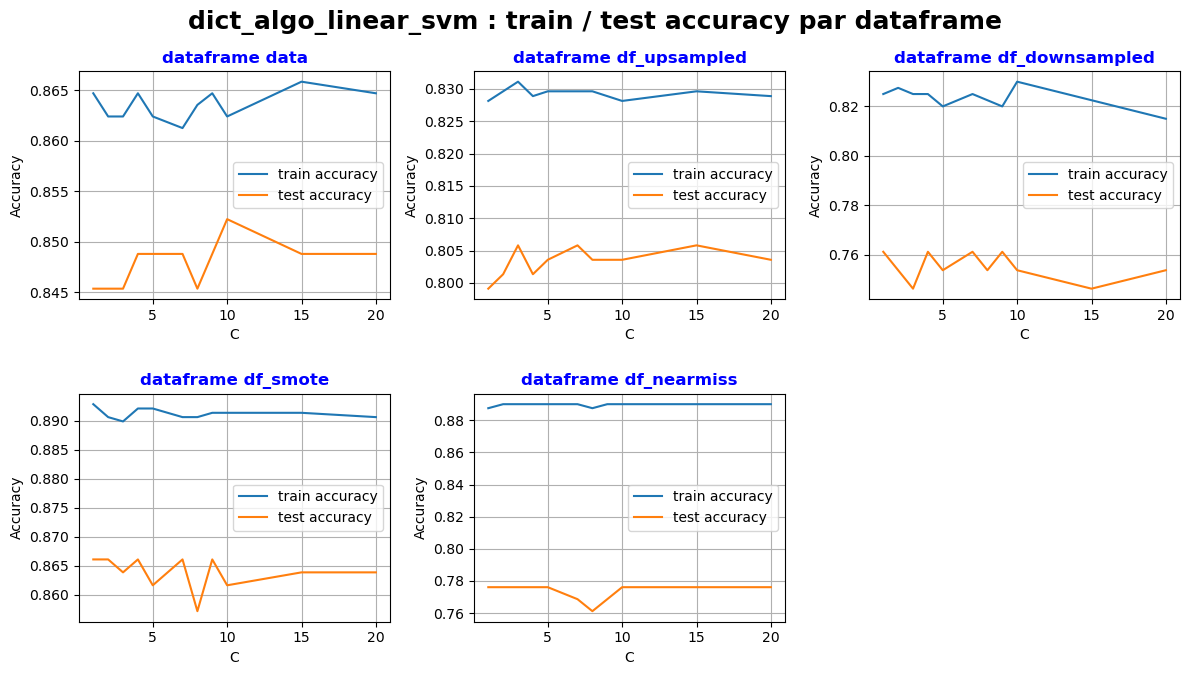

In [84]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_linear_svm)            #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_linear_svm',
                                  hyperparameter_settings_in = C_linear_svm_settings, 
                                  hyperparameter_name_in     = 'C')

In [85]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_linear_svm)                                                          #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_linear_svm')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_linear_svm / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[212  12]
 [ 31  36]] 

confusion_matrix / df_upsampled :
[[176  48]
 [ 39 185]] 

confusion_matrix / df_downsampled :
[[50 17]
 [15 52]] 

confusion_matrix / df_smote :
[[200  24]
 [ 36 188]] 

confusion_matrix / df_nearmiss :
[[59  8]
 [22 45]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_linear_svm / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[848  48]
 [124 144]] 

confusion_matrix_normalised / df_upsampled :
[[704 192]
 [156 740]] 

confusion_matrix_normalised / df_downsampled :
[[200  68]
 [ 60 208]] 

confusion_matrix_normalised / df_smote :
[[800  96]
 [144 752]] 

confusion_matrix_normalised / df_nearmiss :
[[236  32]
 [ 88 180]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_linear_svm / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification

# 8. ARBRES DE DECISION

In [86]:
# Hyperparamètre algorithme
depth_tree_settings = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)

In [87]:
# -------------------------------------------------------
# Fonction arbre de décision pour une valeur de depth_in
# -------------------------------------------------------
def decision_tree(depth_in, X_train_in, X_test_in, y_train_in, y_test_in):

    # classification arbre de décision
    # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    tree = DecisionTreeClassifier(max_depth = depth_in, random_state = 0)
    
    # construction du modèle à partir des données train
    tree.fit(X_train_in, y_train_in)

    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = tree.score(X_train_in, y_train_in)

    # prédiction sur les données de test
    y_pred = tree.predict(X_test_in)
          
    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = tree.score(X_test_in, y_test_in)
        
    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', depth = ', depth_in)

    return train_accuracy_out, test_accuracy_out, y_pred

In [88]:
# -------------------------------------------------------------------------
# Fonction arbre de décision pour toutes les valeurs de depth_in
# -------------------------------------------------------------------------
def decision_tree_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, is_affichage_in):
    
    # initialisation
    best_test_accuracy_tree        = 0
    best_test_depth_tree           = 0
    associated_train_accuracy_tree = 0
    train_accuracy_tree            = []
    test_accuracy_tree             = []
    dict_algo_name                 = 'dict_algo_tree'
    algo_et_df_name                = dict_algo_name + ' / dataframe ' + df_name_in



    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in depth_tree_settings:
        train_accuracy, test_accuracy, y_pred = decision_tree(depth_in   = ind,
                                                              X_train_in = X_train_in, 
                                                              X_test_in  = X_test_in, 
                                                              y_train_in = y_train_in, 
                                                              y_test_in  = y_test_in)
    
        # Stockage dans les listes
        train_accuracy_tree.append(train_accuracy)
        test_accuracy_tree.append(test_accuracy)

        # Meilleur score (données test)
        if (test_accuracy > best_test_accuracy_tree):
            best_test_accuracy_tree        = test_accuracy
            best_test_depth_tree           = ind
            associated_train_accuracy_tree = train_accuracy
            y_pred_tree                    = y_pred
            
            
    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_tree
    # ---------------------------------------------------------
    dict_algo_tree[df_name_in]['train_accuracy'] = train_accuracy_tree
    dict_algo_tree[df_name_in]['test_accuracy']  = test_accuracy_tree

    
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre Depth
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = depth_tree_settings, 
                                      hyperparameter_name_in     = 'Depth', 
                                      train_accuracy_in          = train_accuracy_tree, 
                                      test_accuracy_in           = test_accuracy_tree)
        

    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------        
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 14)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_tree),
          '\nbest test depth\t\t\t=', best_test_depth_tree,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_tree)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 18)
    metrics_best_score(dict_metric_in  = dict_metric_tree[df_name_in],
                       y_in            = y_in, 
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_tree,
                       is_affichage_in = is_affichage_in)    

# 8.1. DONNEES DESEQUILIBREES

# 8.1.1. AUCUN HYPERPARAMETRE

In [89]:
# ----------------------------------------------------
# classification arbres de décision
# ----------------------------------------------------
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('[DecisionTreeClassifier] train set accuracy = {:.3f}'.format(tree.score(X_train, y_train)), 
      ', test set accuracy = {:.3f}'.format(tree.score(X_test, y_test)))

[DecisionTreeClassifier] train set accuracy = 1.000 , test set accuracy = 0.746


# 8.1.2. UN HYPERPARAMETRE

In [90]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
decision_tree_all(df_name_in      = 'data',
                  X_train_in      = X_train, 
                  X_test_in       = X_test, 
                  y_train_in      = y_train, 
                  y_test_in       = y_test,
                  y_in            = y,
                  is_affichage_in = False)

train set accuracy = 0.794 , test set accuracy = 0.780 , depth =  1
train set accuracy = 0.812 , test set accuracy = 0.814 , depth =  2
train set accuracy = 0.859 , test set accuracy = 0.825 , depth =  3
train set accuracy = 0.880 , test set accuracy = 0.818 , depth =  4
train set accuracy = 0.906 , test set accuracy = 0.801 , depth =  5
train set accuracy = 0.920 , test set accuracy = 0.801 , depth =  6
train set accuracy = 0.943 , test set accuracy = 0.766 , depth =  7
train set accuracy = 0.955 , test set accuracy = 0.787 , depth =  8
train set accuracy = 0.972 , test set accuracy = 0.763 , depth =  9
train set accuracy = 0.983 , test set accuracy = 0.770 , depth =  10
train set accuracy = 0.987 , test set accuracy = 0.773 , depth =  11
train set accuracy = 0.991 , test set accuracy = 0.766 , depth =  12
train set accuracy = 0.997 , test set accuracy = 0.756 , depth =  13
train set accuracy = 0.998 , test set accuracy = 0.756 , depth =  14
train set accuracy = 0.999 , test set accur

# 8.2. DONNEES EQUILIBREES

In [91]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
decision_tree_all(df_name_in      = 'df_upsampled',
                  X_train_in      = X_train_upsampled, 
                  X_test_in       = X_test_upsampled, 
                  y_train_in      = y_train_upsampled, 
                  y_test_in       = y_test_upsampled,
                  y_in            = y_upsampled,
                  is_affichage_in = False)

train set accuracy = 0.706 , test set accuracy = 0.712 , depth =  1
train set accuracy = 0.718 , test set accuracy = 0.723 , depth =  2
train set accuracy = 0.768 , test set accuracy = 0.721 , depth =  3
train set accuracy = 0.815 , test set accuracy = 0.790 , depth =  4
train set accuracy = 0.850 , test set accuracy = 0.768 , depth =  5
train set accuracy = 0.882 , test set accuracy = 0.819 , depth =  6
train set accuracy = 0.917 , test set accuracy = 0.837 , depth =  7
train set accuracy = 0.946 , test set accuracy = 0.857 , depth =  8
train set accuracy = 0.969 , test set accuracy = 0.866 , depth =  9
train set accuracy = 0.989 , test set accuracy = 0.882 , depth =  10
train set accuracy = 0.996 , test set accuracy = 0.888 , depth =  11
train set accuracy = 0.999 , test set accuracy = 0.902 , depth =  12
train set accuracy = 1.000 , test set accuracy = 0.895 , depth =  13
train set accuracy = 1.000 , test set accuracy = 0.895 , depth =  14
train set accuracy = 1.000 , test set accur

In [92]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
decision_tree_all(df_name_in      = 'df_downsampled',
                  X_train_in      = X_train_downsampled, 
                  X_test_in       = X_test_downsampled, 
                  y_train_in      = y_train_downsampled, 
                  y_test_in       = y_test_downsampled,
                  y_in            = y_downsampled,
                  is_affichage_in = False)

train set accuracy = 0.720 , test set accuracy = 0.716 , depth =  1
train set accuracy = 0.733 , test set accuracy = 0.731 , depth =  2
train set accuracy = 0.745 , test set accuracy = 0.724 , depth =  3
train set accuracy = 0.828 , test set accuracy = 0.739 , depth =  4
train set accuracy = 0.863 , test set accuracy = 0.739 , depth =  5
train set accuracy = 0.910 , test set accuracy = 0.709 , depth =  6
train set accuracy = 0.968 , test set accuracy = 0.709 , depth =  7
train set accuracy = 0.988 , test set accuracy = 0.709 , depth =  8
train set accuracy = 0.993 , test set accuracy = 0.687 , depth =  9
train set accuracy = 1.000 , test set accuracy = 0.687 , depth =  10
train set accuracy = 1.000 , test set accuracy = 0.687 , depth =  11
train set accuracy = 1.000 , test set accuracy = 0.687 , depth =  12
train set accuracy = 1.000 , test set accuracy = 0.687 , depth =  13
train set accuracy = 1.000 , test set accuracy = 0.687 , depth =  14
train set accuracy = 1.000 , test set accur

In [93]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
decision_tree_all(df_name_in      = 'df_smote',
                  X_train_in      = X_train_smote, 
                  X_test_in       = X_test_smote, 
                  y_train_in      = y_train_smote, 
                  y_test_in       = y_test_smote,
                  y_in            = y_smote,
                  is_affichage_in = False)

train set accuracy = 0.714 , test set accuracy = 0.705 , depth =  1
train set accuracy = 0.737 , test set accuracy = 0.708 , depth =  2
train set accuracy = 0.774 , test set accuracy = 0.721 , depth =  3
train set accuracy = 0.801 , test set accuracy = 0.717 , depth =  4
train set accuracy = 0.856 , test set accuracy = 0.768 , depth =  5
train set accuracy = 0.883 , test set accuracy = 0.775 , depth =  6
train set accuracy = 0.911 , test set accuracy = 0.795 , depth =  7
train set accuracy = 0.946 , test set accuracy = 0.783 , depth =  8
train set accuracy = 0.961 , test set accuracy = 0.772 , depth =  9
train set accuracy = 0.979 , test set accuracy = 0.766 , depth =  10
train set accuracy = 0.985 , test set accuracy = 0.770 , depth =  11
train set accuracy = 0.992 , test set accuracy = 0.795 , depth =  12
train set accuracy = 0.999 , test set accuracy = 0.790 , depth =  13
train set accuracy = 0.999 , test set accuracy = 0.781 , depth =  14
train set accuracy = 1.000 , test set accur

In [94]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
decision_tree_all(df_name_in      = 'df_nearmiss',
                  X_train_in      = X_train_nearmiss, 
                  X_test_in       = X_test_nearmiss, 
                  y_train_in      = y_train_nearmiss, 
                  y_test_in       = y_test_nearmiss,
                  y_in            = y_nearmiss,
                  is_affichage_in = False)

train set accuracy = 0.693 , test set accuracy = 0.649 , depth =  1
train set accuracy = 0.792 , test set accuracy = 0.709 , depth =  2
train set accuracy = 0.823 , test set accuracy = 0.716 , depth =  3
train set accuracy = 0.853 , test set accuracy = 0.784 , depth =  4
train set accuracy = 0.887 , test set accuracy = 0.776 , depth =  5
train set accuracy = 0.925 , test set accuracy = 0.739 , depth =  6
train set accuracy = 0.960 , test set accuracy = 0.724 , depth =  7
train set accuracy = 0.973 , test set accuracy = 0.739 , depth =  8
train set accuracy = 0.988 , test set accuracy = 0.739 , depth =  9
train set accuracy = 0.988 , test set accuracy = 0.724 , depth =  10
train set accuracy = 0.990 , test set accuracy = 0.724 , depth =  11
train set accuracy = 0.993 , test set accuracy = 0.739 , depth =  12
train set accuracy = 0.995 , test set accuracy = 0.731 , depth =  13
train set accuracy = 0.998 , test set accuracy = 0.731 , depth =  14
train set accuracy = 0.998 , test set accur

# 8.3. SYNTHESE POUR TOUS LES DATAFRAMES

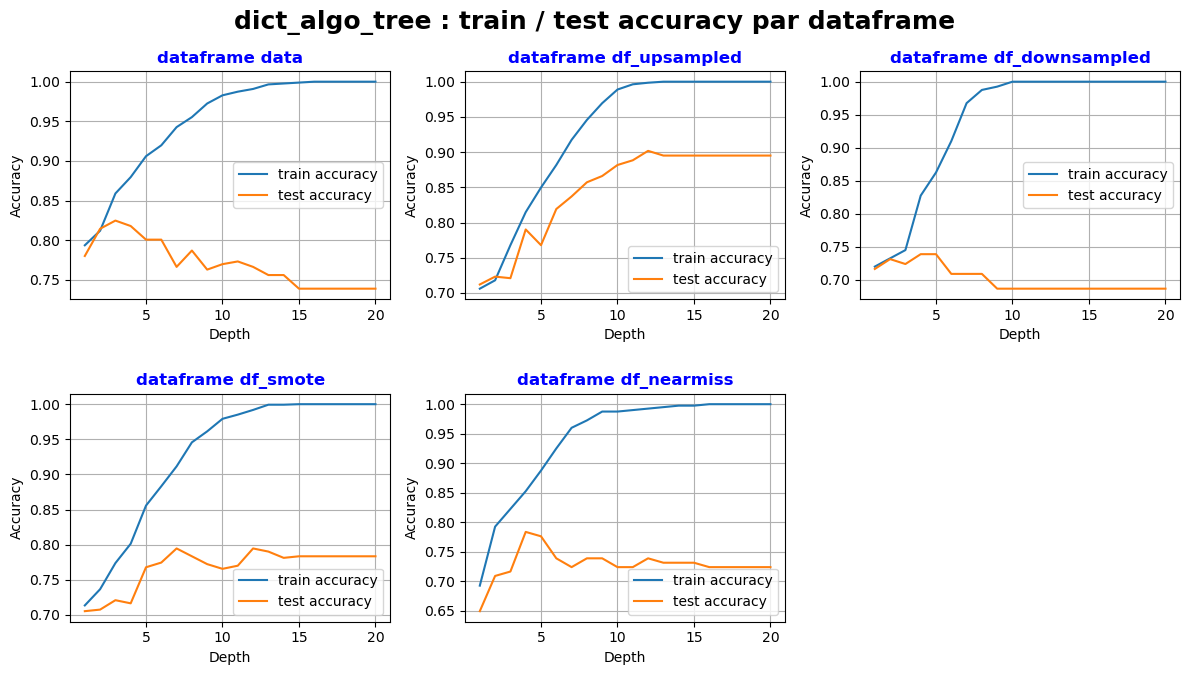

In [95]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_tree)                  #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_tree',
                                  hyperparameter_settings_in = depth_tree_settings, 
                                  hyperparameter_name_in     = 'Depth')

In [96]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_tree)                                                                #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_tree')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_tree / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[204  20]
 [ 31  36]] 

confusion_matrix / df_upsampled :
[[189  35]
 [  9 215]] 

confusion_matrix / df_downsampled :
[[51 16]
 [19 48]] 

confusion_matrix / df_smote :
[[174  50]
 [ 42 182]] 

confusion_matrix / df_nearmiss :
[[56 11]
 [18 49]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_tree / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[816  80]
 [124 144]] 

confusion_matrix_normalised / df_upsampled :
[[756 140]
 [ 36 860]] 

confusion_matrix_normalised / df_downsampled :
[[204  64]
 [ 76 192]] 

confusion_matrix_normalised / df_smote :
[[696 200]
 [168 728]] 

confusion_matrix_normalised / df_nearmiss :
[[224  44]
 [ 72 196]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_tree / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification_report / data :
 

# 9. ENSEMBLE D'ARBRES DE DECISION - FORETS ALEATOIRES

In [97]:
# Hyperparamètre algorithme
estimator_forest_settings = (5, 25, 50, 100, 200, 300, 500, 750, 1_000)

In [98]:
# ---------------------------------------------------------
# Fonction forêt aléatoire pour une valeur de estimator_in
# ---------------------------------------------------------
def random_forest(estimator_in, X_train_in, X_test_in, y_train_in, y_test_in):

    # classification forêt aléatoire
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    forest = RandomForestClassifier(n_estimators = estimator_in, random_state = 0, max_features = 15)

    # construction du modèle à partir des données train
    forest.fit(X_train_in, y_train_in)

    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = forest.score(X_train_in, y_train_in)
    
    # prédiction sur les données de test
    y_pred = forest.predict(X_test_in)
          
    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = forest.score(X_test_in, y_test_in)
        
    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', estimator = ', estimator_in)

    return train_accuracy_out, test_accuracy_out, y_pred

In [99]:
# -----------------------------------------------------------------
# Fonction forêt aléatoire pour toutes les valeurs de estimator_in
# -----------------------------------------------------------------
def random_forest_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, is_affichage_in):

    # initialisation
    best_test_accuracy_forest        = 0
    best_test_estimator_forest       = 0
    associated_train_accuracy_forest = 0
    train_accuracy_forest            = []
    test_accuracy_forest             = [] 
    dict_algo_name                   = 'dict_algo_forest'
    algo_et_df_name                  = dict_algo_name + ' / dataframe ' + df_name_in



    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in estimator_forest_settings:
        train_accuracy, test_accuracy, y_pred = random_forest(estimator_in = ind,
                                                              X_train_in   = X_train_in, 
                                                              X_test_in    = X_test_in, 
                                                              y_train_in   = y_train_in, 
                                                              y_test_in    = y_test_in)
        
        # Stockage dans les listes
        train_accuracy_forest.append(train_accuracy)
        test_accuracy_forest.append(test_accuracy)        
    
        # Meilleur score (données test)
        if (test_accuracy > best_test_accuracy_forest):
            best_test_accuracy_forest        = test_accuracy
            best_test_estimator_forest       = ind
            associated_train_accuracy_forest = train_accuracy
            y_pred_forest                    = y_pred

    
    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_forest
    # ---------------------------------------------------------
    dict_algo_forest[df_name_in]['train_accuracy'] = train_accuracy_forest
    dict_algo_forest[df_name_in]['test_accuracy']  = test_accuracy_forest
    
    
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre Estimator
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = estimator_forest_settings, 
                                      hyperparameter_name_in     = 'Estimator', 
                                      train_accuracy_in          = train_accuracy_forest, 
                                      test_accuracy_in           = test_accuracy_forest)


    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 12)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_forest),
          '\nbest test estimator\t\t=', best_test_estimator_forest,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_forest)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 16)
    metrics_best_score(dict_metric_in  = dict_metric_forest[df_name_in],
                       y_in            = y_in, 
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_forest,
                       is_affichage_in = is_affichage_in) 

# 9.1. DONNEES DESEQUILIBREES

# 9.1.1. AUCUN HYPERPARAMETRE

In [100]:
# ----------------------------------------------------
# classification forêt aléatoire
# ----------------------------------------------------
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print('[RandomForestClassifier] train set accuracy = {:.3f}'.format(forest.score(X_train, y_train)),
      ', test set accuracy = {:.3f}'.format(forest.score(X_test, y_test)))

[RandomForestClassifier] train set accuracy = 1.000 , test set accuracy = 0.859


# 9.1.2. UN HYPERPARAMETRE

In [101]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
random_forest_all(df_name_in      = 'data',
                  X_train_in      = X_train, 
                  X_test_in       = X_test, 
                  y_train_in      = y_train, 
                  y_test_in       = y_test,
                  y_in            = y,
                  is_affichage_in = False)

train set accuracy = 0.979 , test set accuracy = 0.818 , estimator =  5
train set accuracy = 0.997 , test set accuracy = 0.849 , estimator =  25
train set accuracy = 0.999 , test set accuracy = 0.859 , estimator =  50
train set accuracy = 1.000 , test set accuracy = 0.863 , estimator =  100
train set accuracy = 1.000 , test set accuracy = 0.856 , estimator =  200
train set accuracy = 1.000 , test set accuracy = 0.852 , estimator =  300
train set accuracy = 1.000 , test set accuracy = 0.845 , estimator =  500
train set accuracy = 1.000 , test set accuracy = 0.856 , estimator =  750
train set accuracy = 1.000 , test set accuracy = 0.856 , estimator =  1000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe data : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.863 
best test estimator		= 100 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe data : best parameters metrics @@@@@@@@@@@

# 9.2. DONNEES EQUILIBREES

In [102]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
random_forest_all(df_name_in      = 'df_upsampled',
                  X_train_in      = X_train_upsampled, 
                  X_test_in       = X_test_upsampled, 
                  y_train_in      = y_train_upsampled, 
                  y_test_in       = y_test_upsampled,
                  y_in            = y_upsampled,
                  is_affichage_in = False)

train set accuracy = 0.992 , test set accuracy = 0.922 , estimator =  5
train set accuracy = 1.000 , test set accuracy = 0.946 , estimator =  25
train set accuracy = 1.000 , test set accuracy = 0.944 , estimator =  50
train set accuracy = 1.000 , test set accuracy = 0.935 , estimator =  100
train set accuracy = 1.000 , test set accuracy = 0.938 , estimator =  200
train set accuracy = 1.000 , test set accuracy = 0.938 , estimator =  300
train set accuracy = 1.000 , test set accuracy = 0.938 , estimator =  500
train set accuracy = 1.000 , test set accuracy = 0.938 , estimator =  750
train set accuracy = 1.000 , test set accuracy = 0.935 , estimator =  1000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_upsampled : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.946 
best test estimator		= 25 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_upsampled : best parameters metr

In [103]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
random_forest_all(df_name_in      = 'df_downsampled',
                  X_train_in      = X_train_downsampled, 
                  X_test_in       = X_test_downsampled, 
                  y_train_in      = y_train_downsampled, 
                  y_test_in       = y_test_downsampled,
                  y_in            = y_downsampled,
                  is_affichage_in = False)

train set accuracy = 0.970 , test set accuracy = 0.784 , estimator =  5
train set accuracy = 0.998 , test set accuracy = 0.776 , estimator =  25
train set accuracy = 1.000 , test set accuracy = 0.821 , estimator =  50
train set accuracy = 1.000 , test set accuracy = 0.836 , estimator =  100
train set accuracy = 1.000 , test set accuracy = 0.858 , estimator =  200
train set accuracy = 1.000 , test set accuracy = 0.843 , estimator =  300
train set accuracy = 1.000 , test set accuracy = 0.836 , estimator =  500
train set accuracy = 1.000 , test set accuracy = 0.858 , estimator =  750
train set accuracy = 1.000 , test set accuracy = 0.851 , estimator =  1000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_downsampled : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.858 
best test estimator		= 200 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_downsampled : best parameters

In [104]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
random_forest_all(df_name_in      = 'df_smote',
                  X_train_in      = X_train_smote, 
                  X_test_in       = X_test_smote, 
                  y_train_in      = y_train_smote, 
                  y_test_in       = y_test_smote,
                  y_in            = y_smote,
                  is_affichage_in = False)

train set accuracy = 0.988 , test set accuracy = 0.864 , estimator =  5
train set accuracy = 0.999 , test set accuracy = 0.873 , estimator =  25
train set accuracy = 1.000 , test set accuracy = 0.886 , estimator =  50
train set accuracy = 1.000 , test set accuracy = 0.902 , estimator =  100
train set accuracy = 1.000 , test set accuracy = 0.906 , estimator =  200
train set accuracy = 1.000 , test set accuracy = 0.908 , estimator =  300
train set accuracy = 1.000 , test set accuracy = 0.917 , estimator =  500
train set accuracy = 1.000 , test set accuracy = 0.913 , estimator =  750
train set accuracy = 1.000 , test set accuracy = 0.906 , estimator =  1000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_smote : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.917 
best test estimator		= 500 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_smote : best parameters metrics @@@

In [105]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
random_forest_all(df_name_in      = 'df_nearmiss',
                  X_train_in      = X_train_nearmiss, 
                  X_test_in       = X_test_nearmiss, 
                  y_train_in      = y_train_nearmiss, 
                  y_test_in       = y_test_nearmiss,
                  y_in            = y_nearmiss,
                  is_affichage_in = False)

train set accuracy = 0.970 , test set accuracy = 0.724 , estimator =  5
train set accuracy = 1.000 , test set accuracy = 0.761 , estimator =  25
train set accuracy = 1.000 , test set accuracy = 0.799 , estimator =  50
train set accuracy = 1.000 , test set accuracy = 0.806 , estimator =  100
train set accuracy = 1.000 , test set accuracy = 0.813 , estimator =  200
train set accuracy = 1.000 , test set accuracy = 0.813 , estimator =  300
train set accuracy = 1.000 , test set accuracy = 0.799 , estimator =  500
train set accuracy = 1.000 , test set accuracy = 0.806 , estimator =  750
train set accuracy = 1.000 , test set accuracy = 0.806 , estimator =  1000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_nearmiss : best parameters information @@@@@@@@@@@@
best test set accuracy		= 0.813 
best test estimator		= 200 
associated train set accuracy	= 1.000




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_forest / dataframe df_nearmiss : best parameters metri

# 9.3. SYNTHESE POUR TOUS LES DATAFRAMES

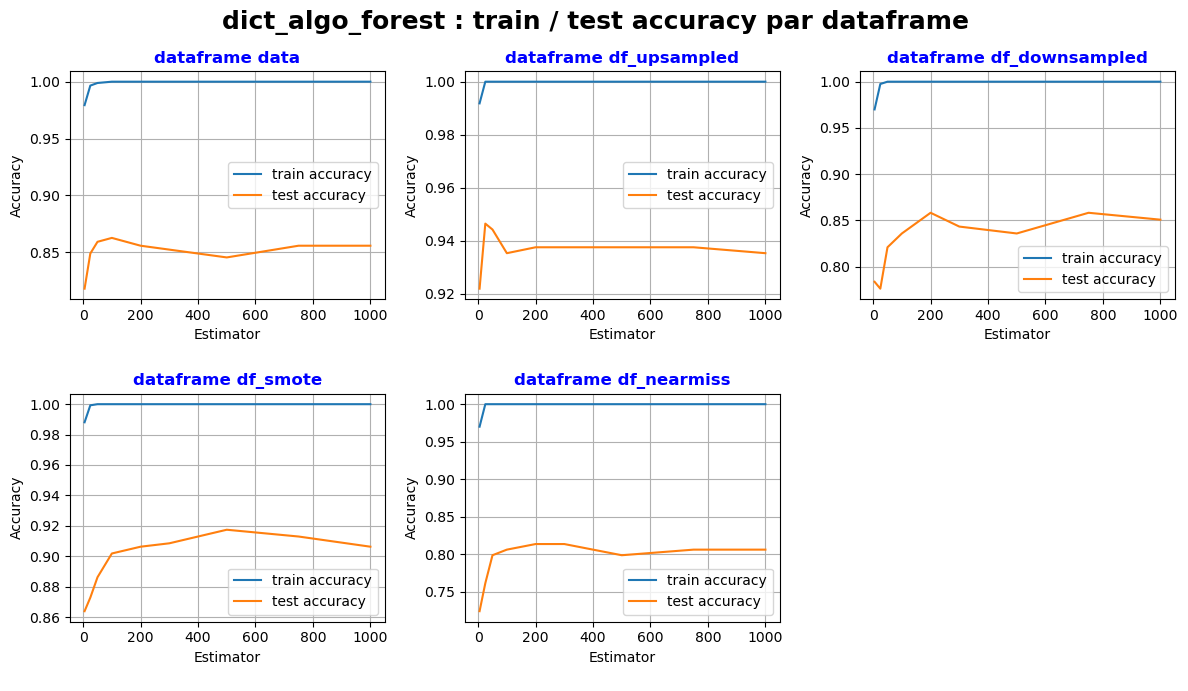

In [106]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_forest)                #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_forest',
                                  hyperparameter_settings_in = estimator_forest_settings, 
                                  hyperparameter_name_in     = 'Estimator')

In [107]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_forest)                                                              #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_forest')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_forest / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[212  12]
 [ 28  39]] 

confusion_matrix / df_upsampled :
[[210  14]
 [ 10 214]] 

confusion_matrix / df_downsampled :
[[60  7]
 [12 55]] 

confusion_matrix / df_smote :
[[203  21]
 [ 16 208]] 

confusion_matrix / df_nearmiss :
[[56 11]
 [14 53]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_forest / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[848  48]
 [112 156]] 

confusion_matrix_normalised / df_upsampled :
[[840  56]
 [ 40 856]] 

confusion_matrix_normalised / df_downsampled :
[[240  28]
 [ 48 220]] 

confusion_matrix_normalised / df_smote :
[[812  84]
 [ 64 832]] 

confusion_matrix_normalised / df_nearmiss :
[[224  44]
 [ 56 212]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_forest / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification_report / da

# 10. ENSEMBLE D'ARBRES DE DECISION - BOOSTING D'ARBRES DE REGRESSION / GBRT (GRADIENT BOOSTED REGRESSION TREES)

In [108]:
# Hyperparamètre algorithme
learning_rate_gbrt_settings = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6)

In [109]:
# ------------------------------------------------------------------------------------
# Fonction boosting d'arbres de régression / GBRT (Gradient Boosted Regression Trees) 
# pour une valeur de learning_rate_in
# ------------------------------------------------------------------------------------
def gradient_boosting(learning_rate_in, X_train_in, X_test_in, y_train_in, y_test_in):

    # classification GBRT
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 5, learning_rate = learning_rate_in)

    # gbrt du modèle à partir des données train
    gbrt.fit(X_train_in, y_train_in)

    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = gbrt.score(X_train_in, y_train_in)

    # prédiction sur les données de test
    y_pred = gbrt.predict(X_test_in)

    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = gbrt.score(X_test_in, y_test_in)

    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', learning rate = ', learning_rate_in)

    return train_accuracy_out, test_accuracy_out, y_pred

In [110]:
# ------------------------------------------------------------------------------------
# Fonction boosting d'arbres de régression / GBRT (Gradient Boosted Regression Trees) 
# pour toutes les valeurs de learning_rate_in
# ------------------------------------------------------------------------------------
def gradient_boosting_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, is_affichage_in):

    # initialisation
    best_test_accuracy_gbrt        = 0
    best_test_learning_rate_gbrt   = 0
    associated_train_accuracy_gbrt = 0
    train_accuracy_gbrt            = []
    test_accuracy_gbrt             = [] 
    dict_algo_name                 = 'dict_algo_gbrt'
    algo_et_df_name                = dict_algo_name + ' / dataframe ' + df_name_in



    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in learning_rate_gbrt_settings:
        train_accuracy, test_accuracy, y_pred = gradient_boosting(learning_rate_in = ind,
                                                                  X_train_in       = X_train_in, 
                                                                  X_test_in        = X_test_in, 
                                                                  y_train_in       = y_train_in, 
                                                                  y_test_in        = y_test_in)
        
        # Stockage dans les listes
        train_accuracy_gbrt.append(train_accuracy)
        test_accuracy_gbrt.append(test_accuracy)        
    
        # Meilleur score (données test)    
        if (test_accuracy > best_test_accuracy_gbrt):
            best_test_accuracy_gbrt        = test_accuracy
            best_test_learning_rate_gbrt   = ind
            associated_train_accuracy_gbrt = train_accuracy
            y_pred_gbrt                    = y_pred
       

    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_gbrt
    # ---------------------------------------------------------
    dict_algo_gbrt[df_name_in]['train_accuracy'] = train_accuracy_gbrt
    dict_algo_gbrt[df_name_in]['test_accuracy']  = test_accuracy_gbrt  

    
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre n_neighbors
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = learning_rate_gbrt_settings, 
                                      hyperparameter_name_in     = 'Learning rate', 
                                      train_accuracy_in          = train_accuracy_gbrt, 
                                      test_accuracy_in           = test_accuracy_gbrt)
        

    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------        
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 14)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_gbrt),
          '\nbest test learning rate\t\t=', best_test_learning_rate_gbrt,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_gbrt)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 18)
    metrics_best_score(dict_metric_in  = dict_metric_gbrt[df_name_in],
                       y_in            = y_in, 
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_gbrt,
                       is_affichage_in = is_affichage_in)    

# 10.1. DONNEES DESEQUILIBREES

# 10.1.1. AUCUN HYPERPARAMETRE

In [111]:
# ----------------------------------------------------
# classification boosting d'arbres de régression / GBRT
# (Gradient Boosted Regression Trees)
# ----------------------------------------------------
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
print('[GradientBoostingClassifier] train set accuracy = {:.3f}'.format(gbrt.score(X_train, y_train)), 
      ', test set accuracy = {:.3f}'.format(gbrt.score(X_test, y_test)))

[GradientBoostingClassifier] train set accuracy = 0.964 , test set accuracy = 0.856


# 10.1.2. UN HYPERPARAMETRE

In [112]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
gradient_boosting_all(df_name_in      = 'data',
                      X_train_in      = X_train, 
                      X_test_in       = X_test, 
                      y_train_in      = y_train, 
                      y_test_in       = y_test,
                      y_in            = y,
                      is_affichage_in = False)

train set accuracy = 0.923 , test set accuracy = 0.842 , learning rate =  0.01
train set accuracy = 0.945 , test set accuracy = 0.838 , learning rate =  0.02
train set accuracy = 0.971 , test set accuracy = 0.863 , learning rate =  0.03
train set accuracy = 0.987 , test set accuracy = 0.859 , learning rate =  0.04
train set accuracy = 0.997 , test set accuracy = 0.856 , learning rate =  0.05
train set accuracy = 0.999 , test set accuracy = 0.838 , learning rate =  0.06
train set accuracy = 0.999 , test set accuracy = 0.845 , learning rate =  0.07
train set accuracy = 1.000 , test set accuracy = 0.838 , learning rate =  0.08
train set accuracy = 1.000 , test set accuracy = 0.849 , learning rate =  0.09
train set accuracy = 1.000 , test set accuracy = 0.849 , learning rate =  0.1
train set accuracy = 1.000 , test set accuracy = 0.845 , learning rate =  0.2
train set accuracy = 1.000 , test set accuracy = 0.859 , learning rate =  0.3
train set accuracy = 1.000 , test set accuracy = 0.859 

# 10.2. DONNEES EQUILIBREES

In [113]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
gradient_boosting_all(df_name_in      = 'df_upsampled',
                      X_train_in      = X_train_upsampled, 
                      X_test_in       = X_test_upsampled, 
                      y_train_in      = y_train_upsampled, 
                      y_test_in       = y_test_upsampled,
                      y_in            = y_upsampled,
                      is_affichage_in = False)

train set accuracy = 0.943 , test set accuracy = 0.886 , learning rate =  0.01
train set accuracy = 0.962 , test set accuracy = 0.893 , learning rate =  0.02
train set accuracy = 0.984 , test set accuracy = 0.915 , learning rate =  0.03
train set accuracy = 0.992 , test set accuracy = 0.920 , learning rate =  0.04
train set accuracy = 0.993 , test set accuracy = 0.926 , learning rate =  0.05
train set accuracy = 0.998 , test set accuracy = 0.929 , learning rate =  0.06
train set accuracy = 1.000 , test set accuracy = 0.935 , learning rate =  0.07
train set accuracy = 1.000 , test set accuracy = 0.920 , learning rate =  0.08
train set accuracy = 1.000 , test set accuracy = 0.924 , learning rate =  0.09
train set accuracy = 1.000 , test set accuracy = 0.926 , learning rate =  0.1
train set accuracy = 1.000 , test set accuracy = 0.929 , learning rate =  0.2
train set accuracy = 1.000 , test set accuracy = 0.944 , learning rate =  0.3
train set accuracy = 1.000 , test set accuracy = 0.940 

In [114]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
gradient_boosting_all(df_name_in      = 'df_downsampled',
                      X_train_in      = X_train_downsampled, 
                      X_test_in       = X_test_downsampled, 
                      y_train_in      = y_train_downsampled, 
                      y_test_in       = y_test_downsampled,
                      y_in            = y_downsampled,
                      is_affichage_in = False)

train set accuracy = 0.955 , test set accuracy = 0.791 , learning rate =  0.01
train set accuracy = 0.993 , test set accuracy = 0.828 , learning rate =  0.02
train set accuracy = 0.998 , test set accuracy = 0.828 , learning rate =  0.03
train set accuracy = 1.000 , test set accuracy = 0.836 , learning rate =  0.04
train set accuracy = 1.000 , test set accuracy = 0.836 , learning rate =  0.05
train set accuracy = 1.000 , test set accuracy = 0.836 , learning rate =  0.06
train set accuracy = 1.000 , test set accuracy = 0.873 , learning rate =  0.07
train set accuracy = 1.000 , test set accuracy = 0.843 , learning rate =  0.08
train set accuracy = 1.000 , test set accuracy = 0.858 , learning rate =  0.09
train set accuracy = 1.000 , test set accuracy = 0.851 , learning rate =  0.1
train set accuracy = 1.000 , test set accuracy = 0.836 , learning rate =  0.2
train set accuracy = 1.000 , test set accuracy = 0.858 , learning rate =  0.3
train set accuracy = 1.000 , test set accuracy = 0.843 

In [115]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
gradient_boosting_all(df_name_in      = 'df_smote',
                      X_train_in      = X_train_smote, 
                      X_test_in       = X_test_smote, 
                      y_train_in      = y_train_smote, 
                      y_test_in       = y_test_smote,
                      y_in            = y_smote,
                      is_affichage_in = False)

train set accuracy = 0.938 , test set accuracy = 0.828 , learning rate =  0.01
train set accuracy = 0.964 , test set accuracy = 0.833 , learning rate =  0.02
train set accuracy = 0.987 , test set accuracy = 0.871 , learning rate =  0.03
train set accuracy = 0.996 , test set accuracy = 0.866 , learning rate =  0.04
train set accuracy = 0.999 , test set accuracy = 0.886 , learning rate =  0.05
train set accuracy = 0.999 , test set accuracy = 0.886 , learning rate =  0.06
train set accuracy = 0.999 , test set accuracy = 0.895 , learning rate =  0.07
train set accuracy = 1.000 , test set accuracy = 0.904 , learning rate =  0.08
train set accuracy = 1.000 , test set accuracy = 0.902 , learning rate =  0.09
train set accuracy = 1.000 , test set accuracy = 0.904 , learning rate =  0.1
train set accuracy = 1.000 , test set accuracy = 0.908 , learning rate =  0.2
train set accuracy = 1.000 , test set accuracy = 0.908 , learning rate =  0.3
train set accuracy = 1.000 , test set accuracy = 0.911 

In [116]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
gradient_boosting_all(df_name_in      = 'df_nearmiss',
                      X_train_in      = X_train_nearmiss, 
                      X_test_in       = X_test_nearmiss, 
                      y_train_in      = y_train_nearmiss, 
                      y_test_in       = y_test_nearmiss,
                      y_in            = y_nearmiss,
                      is_affichage_in = False)

train set accuracy = 0.975 , test set accuracy = 0.791 , learning rate =  0.01
train set accuracy = 0.995 , test set accuracy = 0.784 , learning rate =  0.02
train set accuracy = 1.000 , test set accuracy = 0.813 , learning rate =  0.03
train set accuracy = 1.000 , test set accuracy = 0.813 , learning rate =  0.04
train set accuracy = 1.000 , test set accuracy = 0.821 , learning rate =  0.05
train set accuracy = 1.000 , test set accuracy = 0.828 , learning rate =  0.06
train set accuracy = 1.000 , test set accuracy = 0.799 , learning rate =  0.07
train set accuracy = 1.000 , test set accuracy = 0.806 , learning rate =  0.08
train set accuracy = 1.000 , test set accuracy = 0.821 , learning rate =  0.09
train set accuracy = 1.000 , test set accuracy = 0.813 , learning rate =  0.1
train set accuracy = 1.000 , test set accuracy = 0.799 , learning rate =  0.2
train set accuracy = 1.000 , test set accuracy = 0.813 , learning rate =  0.3
train set accuracy = 1.000 , test set accuracy = 0.828 

# 10.3. SYNTHESE POUR TOUS LES DATAFRAMES

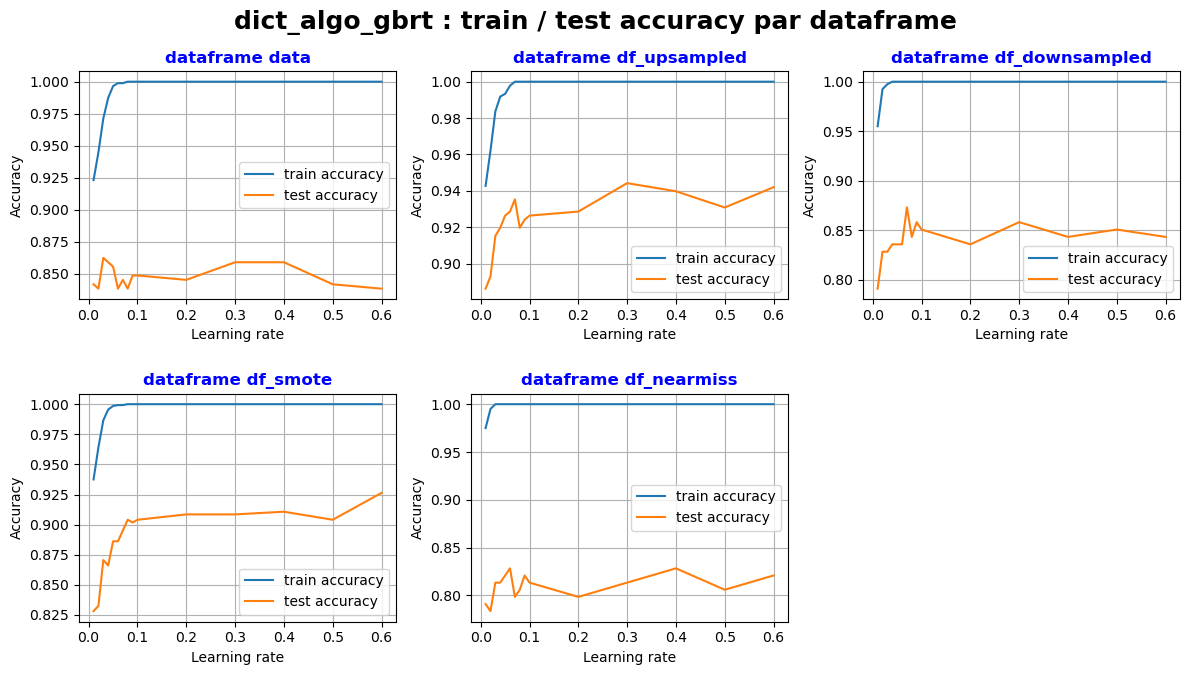

In [117]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_gbrt)                  #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_gbrt',
                                  hyperparameter_settings_in = learning_rate_gbrt_settings, 
                                  hyperparameter_name_in     = 'Learning rate')

In [118]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_gbrt)                                                                #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_gbrt')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_gbrt / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[212  12]
 [ 28  39]] 

confusion_matrix / df_upsampled :
[[206  18]
 [  7 217]] 

confusion_matrix / df_downsampled :
[[59  8]
 [ 9 58]] 

confusion_matrix / df_smote :
[[203  21]
 [ 12 212]] 

confusion_matrix / df_nearmiss :
[[60  7]
 [16 51]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_gbrt / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[848  48]
 [112 156]] 

confusion_matrix_normalised / df_upsampled :
[[824  72]
 [ 28 868]] 

confusion_matrix_normalised / df_downsampled :
[[236  32]
 [ 36 232]] 

confusion_matrix_normalised / df_smote :
[[812  84]
 [ 48 848]] 

confusion_matrix_normalised / df_nearmiss :
[[240  28]
 [ 64 204]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_gbrt / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification_report / data :
 

# 11. RESEAUX DE NEURONES

In [119]:
# Hyperparamètre algorithme
alpha_settings = (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200) # default = 0.0001

In [120]:
# -------------------------------------------------------------------------------------------------
# Fonction perceptron multicouche (multilayer perceptron / MLP) pour une valeur de random_state_in
# -------------------------------------------------------------------------------------------------
def perceptron_multicouche(alpha_in, X_train_in, X_test_in, y_train_in, y_test_in):
   
    # classification réseaux de neurones
    # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    mlp = MLPClassifier(max_iter = 1_000,    # default = 200
                        alpha    = alpha_in)
    
    # construction du modèle à partir des données train
    mlp.fit(X_train_in, y_train_in)
    
    # niveau d'exactitude de la prédiction sur le jeu de train
    train_accuracy_out = mlp.score(X_train_in, y_train_in)
    
    # prédiction sur les données de test
    y_pred = mlp.predict(X_test_in)
          
    # niveau d'exactitude de la prédiction sur le jeu de test
    test_accuracy_out = mlp.score(X_test_in, y_test_in)
        
    print('train set accuracy = {:.3f}'.format(train_accuracy_out), 
          ', test set accuracy = {:.3f}'.format(test_accuracy_out),
          ', alpha = ', alpha_in)

    return train_accuracy_out, test_accuracy_out, y_pred

In [121]:
# ---------------------------------------------------------------------------------------------------------
# Fonction perceptron multicouche (multilayer perceptron / MLP) pour toutes les valeurs de random_state_in
# ---------------------------------------------------------------------------------------------------------
def perceptron_multicouche_all(df_name_in, X_train_in, X_test_in, y_train_in, y_test_in, y_in, is_affichage_in):
    
    # initialisation
    best_test_accuracy_mlp        = 0
    best_test_alpha_mlp           = 0
    associated_train_accuracy_mlp = 0
    train_accuracy_mlp            = []
    test_accuracy_mlp             = []
    dict_algo_name                = 'dict_algo_mlp'
    algo_et_df_name               = dict_algo_name + ' / dataframe ' + df_name_in



    # -------------------------------------------------------------
    # Recherche du meilleur score
    # -------------------------------------------------------------
    for ind in alpha_settings:
        train_accuracy, test_accuracy, y_pred = perceptron_multicouche(alpha_in   = ind,
                                                                       X_train_in = X_train_in, 
                                                                       X_test_in  = X_test_in, 
                                                                       y_train_in = y_train_in, 
                                                                       y_test_in  = y_test_in)
    
        # Stockage dans les listes
        train_accuracy_mlp.append(train_accuracy)
        test_accuracy_mlp.append(test_accuracy)
        
        # Meilleur score (données test)
        if (test_accuracy > best_test_accuracy_mlp):
            best_test_accuracy_mlp           = test_accuracy
            best_test_alpha_mlp              = ind
            associated_train_accuracy_mlp    = train_accuracy
            y_pred_mlp                       = y_pred
   
    
    # ---------------------------------------------------------
    # Mise à jour dans dict_algo_mlp
    # ---------------------------------------------------------
    dict_algo_mlp[df_name_in]['train_accuracy'] = train_accuracy_mlp
    dict_algo_mlp[df_name_in]['test_accuracy']  = test_accuracy_mlp
    
    
    # ----------------------------------------------------------------------------            
    # Affichage (pour comparaison) de l'exactitude de l'apprentissage et du test 
    # en fonction de l'hyperparamètre n_neighbors
    # ----------------------------------------------------------------------------
    if (is_affichage_in):
        affichage_train_test_accuracy(dict_algo_name_in          = dict_algo_name,
                                      df_name_in                 = df_name_in,
                                      hyperparameter_settings_in = alpha_settings, 
                                      hyperparameter_name_in     = 'Alpha', 
                                      train_accuracy_in          = train_accuracy_mlp, 
                                      test_accuracy_in           = test_accuracy_mlp)
    

    # -------------------------------------------------------
    # Informations du meilleur score 
    # -------------------------------------------------------        
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters information', '@' * 15)
    print('best test set accuracy\t\t= {:.3f}'.format(best_test_accuracy_mlp),
          '\nbest test alpha\t\t\t=', best_test_alpha_mlp,
          '\nassociated train set accuracy\t= {:.3f}'.format(associated_train_accuracy_mlp)) 


    # -------------------------------------------------------
    # Métriques du meilleur score 
    # -------------------------------------------------------
    print('\n\n\n')        
    print('@' * 40, algo_et_df_name, ': best parameters metrics', '@' * 19)
    metrics_best_score(dict_metric_in  = dict_metric_mlp[df_name_in],
                       y_in            = y_in, 
                       y_test_in       = y_test_in, 
                       y_pred_in       = y_pred_mlp,
                       is_affichage_in = is_affichage_in)

# 11.1. DONNEES DESEQUILIBREES

# 11.1.1. AUCUN HYPERPARAMETRE

In [122]:
# --------------------------------------------------------------------
# Classification perceptron multicouche (multilayer perceptron / MLP)
# --------------------------------------------------------------------
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print('[MLPClassifier] train set accuracy = {:.3f}'.format(mlp.score(X_train, y_train)), 
      ', test set accuracy = {:.3f}'.format(mlp.score(X_test, y_test)))

[MLPClassifier] train set accuracy = 0.836 , test set accuracy = 0.818


# 11.1.2. UN HYPERPARAMETRE

In [123]:
###################################################
# Algorithme :                                    #
# dataframe data (données déséquilibrées)         #
###################################################
perceptron_multicouche_all(df_name_in      = 'data',
                           X_train_in      = X_train, 
                           X_test_in       = X_test, 
                           y_train_in      = y_train, 
                           y_test_in       = y_test,
                           y_in            = y,
                           is_affichage_in = False)

train set accuracy = 0.858 , test set accuracy = 0.821 , alpha =  1e-05
train set accuracy = 0.869 , test set accuracy = 0.835 , alpha =  0.0001
train set accuracy = 0.869 , test set accuracy = 0.821 , alpha =  0.001
train set accuracy = 0.851 , test set accuracy = 0.811 , alpha =  0.01
train set accuracy = 0.858 , test set accuracy = 0.825 , alpha =  0.1
train set accuracy = 0.821 , test set accuracy = 0.759 , alpha =  1
train set accuracy = 0.851 , test set accuracy = 0.835 , alpha =  10
train set accuracy = 0.812 , test set accuracy = 0.787 , alpha =  100
train set accuracy = 0.820 , test set accuracy = 0.787 , alpha =  200




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe data : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.835 
best test alpha			= 0.0001 
associated train set accuracy	= 0.869




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe data : best parameters metrics @@@@@@@@@@@@@@@@@@@
Accuracy score	= 0.835

# 11.2. DONNEES EQUILIBREES

In [124]:
##########################################################
# Algorithme :                                           #
# dataframe df_upsampled (random duplicate oversampling) #
##########################################################
perceptron_multicouche_all(df_name_in      = 'df_upsampled',
                           X_train_in      = X_train_upsampled, 
                           X_test_in       = X_test_upsampled, 
                           y_train_in      = y_train_upsampled, 
                           y_test_in       = y_test_upsampled,
                           y_in            = y_upsampled,
                           is_affichage_in = False)

train set accuracy = 0.815 , test set accuracy = 0.783 , alpha =  1e-05
train set accuracy = 0.822 , test set accuracy = 0.781 , alpha =  0.0001
train set accuracy = 0.804 , test set accuracy = 0.768 , alpha =  0.001
train set accuracy = 0.862 , test set accuracy = 0.828 , alpha =  0.01
train set accuracy = 0.856 , test set accuracy = 0.812 , alpha =  0.1
train set accuracy = 0.818 , test set accuracy = 0.799 , alpha =  1
train set accuracy = 0.807 , test set accuracy = 0.772 , alpha =  10
train set accuracy = 0.762 , test set accuracy = 0.766 , alpha =  100
train set accuracy = 0.765 , test set accuracy = 0.750 , alpha =  200




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_upsampled : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.828 
best test alpha			= 0.01 
associated train set accuracy	= 0.862




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_upsampled : best parameters metrics @@@@@@@@@@@@@@@@@@@
Accuracy

In [125]:
#############################################################
# Algorithme :                                              #
# dataframe df_downsampled (random duplicate undersampling) #
#############################################################
perceptron_multicouche_all(df_name_in      = 'df_downsampled',
                           X_train_in      = X_train_downsampled, 
                           X_test_in       = X_test_downsampled, 
                           y_train_in      = y_train_downsampled, 
                           y_test_in       = y_test_downsampled,
                           y_in            = y_downsampled,
                           is_affichage_in = False)

train set accuracy = 0.760 , test set accuracy = 0.679 , alpha =  1e-05
train set accuracy = 0.800 , test set accuracy = 0.821 , alpha =  0.0001
train set accuracy = 0.932 , test set accuracy = 0.791 , alpha =  0.001
train set accuracy = 0.805 , test set accuracy = 0.731 , alpha =  0.01
train set accuracy = 0.833 , test set accuracy = 0.761 , alpha =  0.1
train set accuracy = 0.792 , test set accuracy = 0.784 , alpha =  1
train set accuracy = 0.830 , test set accuracy = 0.664 , alpha =  10
train set accuracy = 0.805 , test set accuracy = 0.791 , alpha =  100
train set accuracy = 0.745 , test set accuracy = 0.709 , alpha =  200




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_downsampled : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.821 
best test alpha			= 0.0001 
associated train set accuracy	= 0.800




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_downsampled : best parameters metrics @@@@@@@@@@@@@@@@@@@
Ac

In [126]:
#############################################################
# Algorithme :                                              #
# dataframe df_smote (oversampling technique - SMOTE)       #
#############################################################
perceptron_multicouche_all(df_name_in      = 'df_smote',
                           X_train_in      = X_train_smote, 
                           X_test_in       = X_test_smote, 
                           y_train_in      = y_train_smote, 
                           y_test_in       = y_test_smote,
                           y_in            = y_smote,
                           is_affichage_in = False)

train set accuracy = 0.812 , test set accuracy = 0.775 , alpha =  1e-05
train set accuracy = 0.830 , test set accuracy = 0.812 , alpha =  0.0001
train set accuracy = 0.834 , test set accuracy = 0.786 , alpha =  0.001
train set accuracy = 0.833 , test set accuracy = 0.806 , alpha =  0.01
train set accuracy = 0.784 , test set accuracy = 0.752 , alpha =  0.1
train set accuracy = 0.836 , test set accuracy = 0.790 , alpha =  1
train set accuracy = 0.842 , test set accuracy = 0.792 , alpha =  10
train set accuracy = 0.840 , test set accuracy = 0.812 , alpha =  100
train set accuracy = 0.809 , test set accuracy = 0.779 , alpha =  200




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_smote : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.812 
best test alpha			= 0.0001 
associated train set accuracy	= 0.830




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_smote : best parameters metrics @@@@@@@@@@@@@@@@@@@
Accuracy score

In [127]:
##############################################################
# Algorithme :                                               #
# dataframe df_nearmiss (undersampling technique - NearMiss) #
##############################################################
perceptron_multicouche_all(df_name_in      = 'df_nearmiss',
                           X_train_in      = X_train_nearmiss, 
                           X_test_in       = X_test_nearmiss, 
                           y_train_in      = y_train_nearmiss, 
                           y_test_in       = y_test_nearmiss,
                           y_in            = y_nearmiss,
                           is_affichage_in = False)

train set accuracy = 0.938 , test set accuracy = 0.799 , alpha =  1e-05
train set accuracy = 0.980 , test set accuracy = 0.806 , alpha =  0.0001
train set accuracy = 0.948 , test set accuracy = 0.806 , alpha =  0.001
train set accuracy = 0.948 , test set accuracy = 0.821 , alpha =  0.01
train set accuracy = 0.970 , test set accuracy = 0.813 , alpha =  0.1
train set accuracy = 0.922 , test set accuracy = 0.769 , alpha =  1
train set accuracy = 0.907 , test set accuracy = 0.791 , alpha =  10


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


train set accuracy = 0.840 , test set accuracy = 0.754 , alpha =  100
train set accuracy = 0.825 , test set accuracy = 0.746 , alpha =  200




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_nearmiss : best parameters information @@@@@@@@@@@@@@@
best test set accuracy		= 0.821 
best test alpha			= 0.01 
associated train set accuracy	= 0.948




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_algo_mlp / dataframe df_nearmiss : best parameters metrics @@@@@@@@@@@@@@@@@@@
Accuracy score	= 0.821
Recall score	= 0.687
Precision score	= 0.939
F1 score	= 0.793


C:\Users\valdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# 11.3. SYNTHESE POUR TOUS LES DATAFRAMES

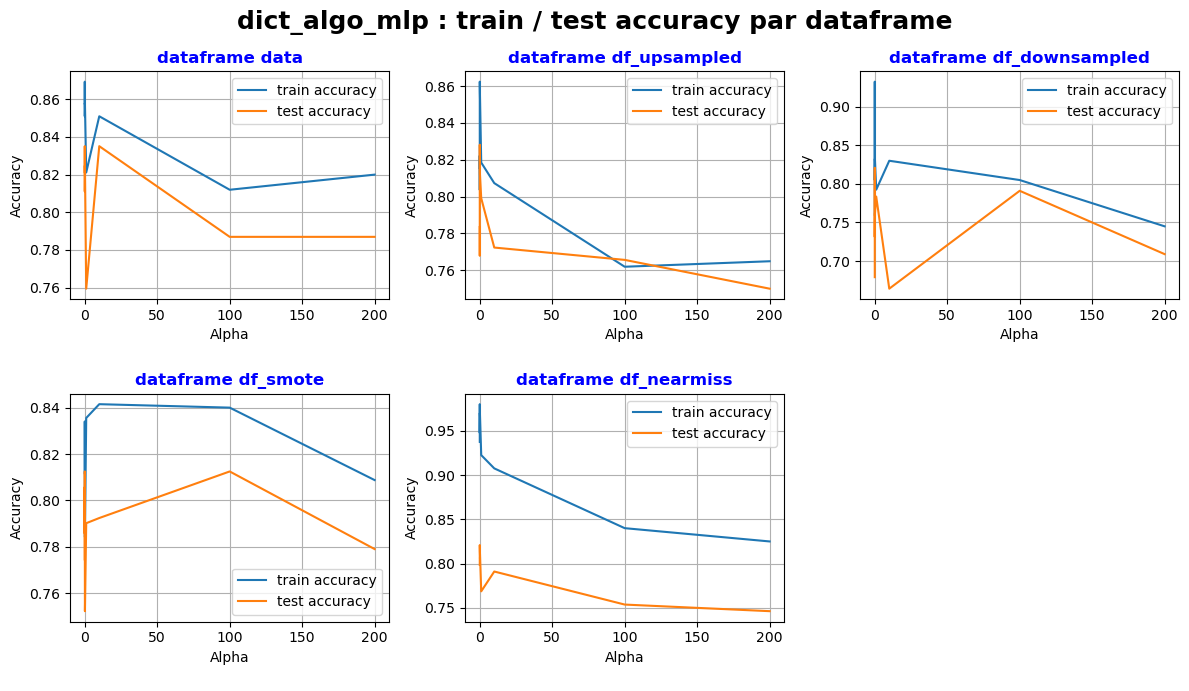

In [129]:
###########################################################################################
# Affichage de l'exactitude de l'apprentissage et du test en fonction d'un hyperparamètre #
# pour tous les dataframes d'un type d'algorithme (ici : dict_algo_mlp)                   #
###########################################################################################
affichage_train_test_accuracy_all(dict_algo_name_in          = 'dict_algo_mlp',
                                  hyperparameter_settings_in = alpha_settings, 
                                  hyperparameter_name_in     = 'Alpha')

In [130]:
###########################################################################################
# Affichage métriques du meilleur score pour tous les dataframes d'un type d'algorithme   #
# (ici : dict_metric_mlp)                                                                 #
###########################################################################################
affichage_metrics_best_score_all(dict_metric_name_in = 'dict_metric_mlp')

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_mlp / confusion_matrix : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix / data :
[[205  19]
 [ 29  38]] 

confusion_matrix / df_upsampled :
[[177  47]
 [ 30 194]] 

confusion_matrix / df_downsampled :
[[58  9]
 [15 52]] 

confusion_matrix / df_smote :
[[165  59]
 [ 25 199]] 

confusion_matrix / df_nearmiss :
[[64  3]
 [21 46]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_mlp / confusion_matrix_normalised : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
confusion_matrix_normalised / data :
[[820  76]
 [116 152]] 

confusion_matrix_normalised / df_upsampled :
[[708 188]
 [120 776]] 

confusion_matrix_normalised / df_downsampled :
[[232  36]
 [ 60 208]] 

confusion_matrix_normalised / df_smote :
[[660 236]
 [100 796]] 

confusion_matrix_normalised / df_nearmiss :
[[256  12]
 [ 84 184]] 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_mlp / classification_report : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
classification_report / data :
    

# 12. SYNTHESE ALGORITHMES

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @                                   RAPPEL                                     @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

    #################################################
    # ACCURACY SCORE                                #
    #################################################
    # Accuracy score : rapport entre le nombre de prédictions correctes et le nombre total d’échantillons traités.
    #
    #                  TP + TN
    # accuracy = -------------------
    #             TP + TN + FP + FN
    
 
    
    #################################################
    # RECALL SCORE                                  #
    #################################################
    # Recall score (ou sensibilité ou taux positif réel) : nombre de vrais positifs divisé par le nombre de valeurs 
    # positives dans les données de test. C’est une mesure de l’exhaustivité du classifieur. 
    # Un faible recall indique un nombre élevé de faux négatifs.
    #
    #                    True Positive
    # recall = --------------------------------
    #           True Positive + False Negative

     
    
    #################################################
    # PRECISION SCORE                               #
    #################################################   
    # Precision score (ou valeur prédictive positive) : nombre de vrais positifs divisé par toutes les prédictions positives.
    # C’est une mesure de l’exactitude du classificateur. 
    # Une faible précision indique un nombre élevé de faux positifs.
    #    
    #                       True Positive
    # precision = --------------------------------
    #              True Positive + False Positive
    
      
    
    #################################################
    # F1 SCORE                                      #
    #################################################     
    # F1 score : moyenne pondérée de la précision et du recall. 
    # 1 indique une précision et recall parfaits et 0 pire.
    #
    #          Precision * Recall
    # F1 = 2* --------------------
    #          Precision + Recall

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_knn / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled df_smote   df_nearmiss  | Meilleur score
# --- metric -----|--------------------------------------------------------------|------------------
# accuracy_score  | 0.777    0.873        0.701          0.837      0.716        | df_upsampled
# recall_score    | 0.134    0.964        0.537          0.879      0.657        | df_upsampled
# precision_score | 0.562    0.815        0.8            0.811      0.746        | df_upsampled
# f1_score        | 0.217    0.883        0.643          0.844      0.698        | df_upsampled
#
# dict_metric_knn / meilleurs scores : df_upsampled

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_logreg / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled df_smote   df_nearmiss  | Meilleur score
# --- metric -----|--------------------------------------------------------------|------------------
# accuracy_score  | 0.849    0.808        0.769          0.866      0.784        | df_smote
# recall_score    | 0.567    0.826        0.791          0.853      0.672        | df_smote
# precision_score | 0.717    0.797        0.757          0.876      0.865        | df_smote
# f1_score        | 0.633    0.811        0.774          0.864      0.756        | df_smote
#
# dict_metric_logreg / meilleurs scores : df_smote

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_linear_svm / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled df_smote   df_nearmiss  | Meilleur score
# --- metric -----|--------------------------------------------------------------|------------------
# accuracy_score  | 0.852    0.806        0.761          0.866      0.776        | df_smote
# recall_score    | 0.537    0.826        0.776          0.839      0.672        | df_smote
# precision_score | 0.75     0.794        0.754          0.887      0.849        | df_smote
# f1_score        | 0.626    0.81         0.765          0.862      0.75         | df_smote
#
# dict_metric_linear_svm / meilleurs scores : df_smote

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_tree / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled df_smote   df_nearmiss  | Meilleur score
# --- metric -----|--------------------------------------------------------------|------------------
# accuracy_score  | 0.825    0.902        0.739          0.795       0.784       | df_upsampled
# recall_score    | 0.537    0.96         0.716          0.812       0.731       | df_upsampled
# precision_score | 0.643    0.86         0.75           0.784       0.817       | df_upsampled
# f1_score        | 0.585    0.907        0.733          0.798       0.772       | df_upsampled
#
# dict_metric_tree / meilleurs scores : df_upsampled

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_forest / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled df_smote    df_nearmiss  | Meilleur score
# --- metric -----|---------------------------------------------------------------|-----------------
# accuracy_score  | 0.863    0.946        0.858          0.917       0.813        | df_upsampled
# recall_score    | 0.582    0.955        0.821          0.929       0.791        | df_upsampled
# precision_score | 0.765    0.939        0.887          0.908       0.828        | df_upsampled
# f1_score        | 0.661    0.947        0.853          0.918       0.809        | df_upsampled
#
# dict_metric_forest / meilleurs scores : df_upsampled

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_gbrt / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled df_smote    df_nearmiss  | Meilleur score
# --- metric -----|---------------------------------------------------------------|-----------------
# accuracy_score  | 0.863    0.944        0.873          0.926       0.828        | df_upsampled
# recall_score    | 0.582    0.969        0.866          0.946       0.761        | df_upsampled
# precision_score | 0.765    0.923        0.879          0.91        0.879        | df_upsampled
# f1_score        | 0.661    0.946        0.872          0.928       0.816        | df_upsampled
#
# dict_metric_gbrt / meilleurs scores : df_upsampled

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ dict_metric_mlp / xxx_score : @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# df_xxx          | data     df_upsampled df_downsampled  df_smote    df_nearmiss  | Meilleur score
# --- metric -----|----------------------------------------------------------------|----------------
# accuracy_score  | 0.835    0.828        0.821           0.812       0.821        | data
# recall_score    | 0.567    0.866        0.776           0.888       0.687        | df_smote
# precision_score | 0.667    0.805        0.852           0.771       0.939        | df_nearmiss
# f1_score        | 0.613    0.834        0.812           0.826       0.793        | df_upsampled
#
# dict_metric_mlp / meilleurs scores : / (pas de dataframe unique)

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @               SYNTHESE DES MEILLEURS SCORES / DICT_METRIC_XXX                @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# dict_metric_xxx | knn       | logreg | linear_svm | tree      | forest    | gbrt      | mlp       |
# df_xxx          | upsampled | smote  | smote      | upsampled | upsampled | upsampled | /         | Meilleur score
# --- metric -----|-----------|--------|------------|-----------|-----------|-----------|-----------|----------------
# accuracy_score  | 0.873     | 0.866  | 0.866      | 0.902     | 0.946     | 0.944     | /         | forest
# recall_score    | 0.964     | 0.853  | 0.839      | 0.96      | 0.955     | 0.969     | /         | gbrt
# precision_score | 0.815     | 0.876  | 0.887      | 0.86      | 0.939     | 0.923     | /         | forest
# f1_score        | 0.883     | 0.864  | 0.862      | 0.907     | 0.947     | 0.946     | /         | forest
#
#
# ==> les meilleurs scores sont avec :
#     --> dict_metric_forest, 
#     --> dataframe données équilibrées df_upsampled.

# 13. OPTIMISATION

In [ ]:
# Optimisation avec :
# --> un des algorithmes des meilleures métriques : algo_forest.
# --> le meilleur dataframe : df_upsampled.

# 13.1. IMPORTANCE DES VARIABLES

In [131]:
# Calcul nombre maximum de caractères pour le nom de la colonne
taille_max_col = 0 # initialisation

for col in df_upsampled.columns:
    if len(col) > taille_max_col:
        taille_max_col = len(col)
    print('taille_max_col =', taille_max_col, '\t, len(col) =', len(col), ', \tcol =', col)
    
print('\n==> taille_max_col =', taille_max_col)

taille_max_col = 3 	, len(col) = 3 , 	col = sex
taille_max_col = 3 	, len(col) = 3 , 	col = age
taille_max_col = 6 	, len(col) = 6 , 	col = corpus
taille_max_col = 6 	, len(col) = 5 , 	col = group
taille_max_col = 9 	, len(col) = 9 , 	col = child_TNW
taille_max_col = 9 	, len(col) = 9 , 	col = child_TNS
taille_max_col = 12 	, len(col) = 12 , 	col = examiner_TNW
taille_max_col = 12 	, len(col) = 8 , 	col = freq_ttr
taille_max_col = 12 	, len(col) = 11 , 	col = r_2_i_verbs
taille_max_col = 12 	, len(col) = 12 , 	col = num_pos_tags
taille_max_col = 12 	, len(col) = 5 , 	col = n_dos
taille_max_col = 12 	, len(col) = 10 , 	col = repetition
taille_max_col = 12 	, len(col) = 9 , 	col = retracing
taille_max_col = 12 	, len(col) = 7 , 	col = fillers
taille_max_col = 12 	, len(col) = 8 , 	col = s_1g_ppl
taille_max_col = 12 	, len(col) = 8 , 	col = s_2g_ppl
taille_max_col = 12 	, len(col) = 8 , 	col = s_3g_ppl
taille_max_col = 12 	, len(col) = 8 , 	col = d_1g_ppl
taille_max_col = 12 	, len(col) =

In [132]:
###############################################
#             Forêt aléatoire                 #
###############################################
# classification forêt aléatoire
forest = RandomForestClassifier(n_estimators = 50, # best test estimator = 50 
                                random_state = 0, max_features = 15, n_jobs = 1)

# construction du modèle à partir des données train
forest.fit(X_train_upsampled, y_train_upsampled)


# Feature Importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis = 0)
indices = np.argsort(importances)[::-1]


names_upsampled = df_upsampled.columns

print('Features sorted by their score (random forest) :')
print('Indice', '\t', 'Name', '\t\t\t\t', 'Importance')
for f in range(X.shape[1]):
    print(indices[f], '\t', names_upsampled[indices[f]], (taille_max_col - len(names_upsampled[indices[f]])) * ' ', '\t',
          round(importances[indices[f]], 4))

Features sorted by their score (random forest) :
Indice 	 Name 				 Importance
19 	 average_syl            	 0.1039
21 	 mlu100_utts            	 0.0944
7 	 freq_ttr               	 0.066
22 	 verb_utt               	 0.0584
1 	 age                    	 0.0531
32 	 articles               	 0.0383
15 	 s_2g_ppl               	 0.0321
16 	 s_3g_ppl               	 0.0304
38 	 contractible_aux       	 0.0294
23 	 dss                    	 0.0276
13 	 fillers                	 0.0265
48 	 total_error            	 0.0252
17 	 d_1g_ppl               	 0.024
5 	 child_TNS              	 0.0233
28 	 plural_s               	 0.022
39 	 word_errors            	 0.021
14 	 s_1g_ppl               	 0.0191
6 	 examiner_TNW           	 0.0183
8 	 r_2_i_verbs            	 0.0169
3 	 group                  	 0.0162
4 	 child_TNW              	 0.0156
20 	 mlu_words              	 0.0152
18 	 d_2g_ppl               	 0.0146
12 	 retracing              	 0.0141
43 	 n_3s_v                 	 0.0138
34 	 re

# 13.2. OPTIMISATION PARAMETRES MEILLEUR ALGORITHME

In [134]:
###########################################################################
# Forêt aléatoire, dataframe df_upsampled (random duplicate oversampling) #
###########################################################################
# Valeurs hyperparamètres
estimator_forest_settings = (5, 25, 50, 100, 200, 300, 500, 750, 1_000)
max_depth_forest_settings = (1, 2, 3, 4, 5)
criterion_forest_settings = ('gini', 'entropy', 'log_loss')

# Initialisation meilleurs scores
best_accuracy_score  = 0
best_recall_score    = 0
best_precision_score = 0
best_f1_score        = 0

# Initialisation meilleurs hyperparamètres
best_estimator      = 0
best_max_depth      = 0
best_criterion      = ''


for estimator in estimator_forest_settings:
    print('\n')
    print('@' * 44, 'hyperparameters : estimator =', estimator,  '@' * 44)
    
    for max_depth in max_depth_forest_settings:
        for criterion in criterion_forest_settings:
            # classification forêt aléatoire
            # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
            forest = RandomForestClassifier(n_estimators = estimator, 
                                            max_depth    = max_depth,
                                            criterion    = criterion)

            # construction du modèle à partir des données train
            forest.fit(X_train_upsampled, y_train_upsampled)
    
            # prédiction sur les données de test
            y_pred_forest = forest.predict(X_test_upsampled)
            

            
            #################################################
            # ACCURACY SCORE                                #
            #################################################            
            accuracy_score_ = accuracy_score(y_true = y_test_upsampled, 
                                             y_pred = y_pred_forest)
            
            #################################################
            # RECALL SCORE                                  #
            #################################################
            recall_score_ = recall_score(y_true = y_test_upsampled, 
                                         y_pred = y_pred_forest)                 
    
            #################################################
            # PRECISION SCORE                               #
            #################################################   
            precision_score_ = precision_score(y_true = y_test_upsampled, 
                                               y_pred = y_pred_forest)            
            
            #################################################
            # F1 SCORE                                      # 
            ################################################# 
            f1_score_ = f1_score(y_true = y_test_upsampled, 
                                 y_pred = y_pred_forest)
            
            # Traces
            print('max_depth =' , max_depth, ', criterion =', criterion, '\t', '>' * 3, 'SCORES :',  
                  'accuracy =', round(accuracy_score_, 4), ', recall =', round(recall_score_, 4),
                  ', precision =', round(precision_score_, 4), ', F1 =', round(f1_score_, 4))
            
            # Recherche meilleurs scores
            if ((accuracy_score_  > best_accuracy_score) and
                (recall_score_    > best_recall_score) and
                (precision_score_ > best_precision_score) and
                (f1_score_        > best_f1_score)):
                
                # Maj meilleurs scores
                best_accuracy_score   = accuracy_score_
                best_recall_score_    = recall_score_
                best_precision_score_ = precision_score_
                best_f1_score         = f1_score_
                
                # Maj meilleurs hyperparamètres
                best_estimator      = estimator
                best_max_depth      = max_depth
                best_criterion      = criterion


print('\nbest accuracy score = {:.3f}'.format(best_accuracy_score),
      ', best recall score = {:.3f}'.format(best_recall_score_),
      ', best precision score = {:.3f}'.format(best_precision_score_),
      ', best F1 score = {:.3f}'.format(best_f1_score),
      
      '\nbest hyperparameters : estimator =', best_estimator,
      ', max_depth =', best_max_depth, ', criterion =', best_criterion) 



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ hyperparameters : estimator = 5 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
max_depth = 1 , criterion = gini 	 >>> SCORES : accuracy = 0.7098 , recall = 0.6562 , precision = 0.735 , F1 = 0.6934
max_depth = 1 , criterion = entropy 	 >>> SCORES : accuracy = 0.6987 , recall = 0.6473 , precision = 0.7214 , F1 = 0.6824
max_depth = 1 , criterion = log_loss 	 >>> SCORES : accuracy = 0.6763 , recall = 0.7098 , precision = 0.6653 , F1 = 0.6868
max_depth = 2 , criterion = gini 	 >>> SCORES : accuracy = 0.7277 , recall = 0.6786 , precision = 0.7525 , F1 = 0.7136
max_depth = 2 , criterion = entropy 	 >>> SCORES : accuracy = 0.7009 , recall = 0.6295 , precision = 0.7344 , F1 = 0.6779
max_depth = 2 , criterion = log_loss 	 >>> SCORES : accuracy = 0.7433 , recall = 0.7143 , precision = 0.7583 , F1 = 0.7356
max_depth = 3 , criterion = gini 	 >>> SCORES : accuracy = 0.7388 , recall = 0.7054 , precision = 0.756 , F1 = 0.7298
max_depth = 3 , criterion = ent

max_depth = 2 , criterion = gini 	 >>> SCORES : accuracy = 0.7478 , recall = 0.7188 , precision = 0.763 , F1 = 0.7402
max_depth = 2 , criterion = entropy 	 >>> SCORES : accuracy = 0.7522 , recall = 0.7277 , precision = 0.7653 , F1 = 0.746
max_depth = 2 , criterion = log_loss 	 >>> SCORES : accuracy = 0.7455 , recall = 0.7277 , precision = 0.7546 , F1 = 0.7409
max_depth = 3 , criterion = gini 	 >>> SCORES : accuracy = 0.7634 , recall = 0.7321 , precision = 0.781 , F1 = 0.7558
max_depth = 3 , criterion = entropy 	 >>> SCORES : accuracy = 0.7634 , recall = 0.7188 , precision = 0.7892 , F1 = 0.7523
max_depth = 3 , criterion = log_loss 	 >>> SCORES : accuracy = 0.7634 , recall = 0.7321 , precision = 0.781 , F1 = 0.7558
max_depth = 4 , criterion = gini 	 >>> SCORES : accuracy = 0.779 , recall = 0.75 , precision = 0.7962 , F1 = 0.7724
max_depth = 4 , criterion = entropy 	 >>> SCORES : accuracy = 0.7812 , recall = 0.75 , precision = 0.8 , F1 = 0.7742
max_depth = 4 , criterion = log_loss 	 >>> 

max_depth = 3 , criterion = entropy 	 >>> SCORES : accuracy = 0.7589 , recall = 0.7232 , precision = 0.7788 , F1 = 0.75
max_depth = 3 , criterion = log_loss 	 >>> SCORES : accuracy = 0.7567 , recall = 0.7188 , precision = 0.7778 , F1 = 0.7471
max_depth = 4 , criterion = gini 	 >>> SCORES : accuracy = 0.779 , recall = 0.7455 , precision = 0.799 , F1 = 0.7714
max_depth = 4 , criterion = entropy 	 >>> SCORES : accuracy = 0.7746 , recall = 0.75 , precision = 0.7887 , F1 = 0.7689
max_depth = 4 , criterion = log_loss 	 >>> SCORES : accuracy = 0.7835 , recall = 0.75 , precision = 0.8038 , F1 = 0.776
max_depth = 5 , criterion = gini 	 >>> SCORES : accuracy = 0.8214 , recall = 0.8125 , precision = 0.8273 , F1 = 0.8198
max_depth = 5 , criterion = entropy 	 >>> SCORES : accuracy = 0.817 , recall = 0.7991 , precision = 0.8287 , F1 = 0.8136
max_depth = 5 , criterion = log_loss 	 >>> SCORES : accuracy = 0.8147 , recall = 0.7991 , precision = 0.8249 , F1 = 0.8118

best accuracy score = 0.837 , best r